<a href="https://colab.research.google.com/github/dassangita844/Climate-data-analysis-Delhi-/blob/main/Delhi_climate_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Delhi's daily climate time series data**

### *Sangita Das*

## **Introduction**
This project analyzes Delhi's daily climate data, spanning from January 1st, 2013, to April 24th, 2017. As one of the world's most populous and rapidly growing cities, Delhi's climate has significant implications for public health, urban planning, and sustainability. By examining detailed weather patterns over this four-year period, we can uncover trends and insights that may inform decision-making related to climate resilience and infrastructure development.

## **Objectives**

This project aims to extract meaningful patterns and relationships from the climate data, paving the way for more informed and effective strategies to cope with climate challenges in Delhi. The key goal of the codebook is
- To understand the pattern of Delhi's climate data over time.
- To predict daily temperatures based on other weather factors like humidity, wind speed, and pressure using different machine learning approaches.
- To predict Delhi's temparature forcasting in the next one decade.

##**Data Overview**
The dataset consists of four key meteorological features, providing a comprehensive view of daily weather conditions in Delhi:

- Mean temperature averaged out from multiple 3 hour intervals in a day (meantemp)
- Humidity value for the day (units are grams of water vapor per cubic meter volume of air) (humidity)
- Wind speed measured in kmph (wind_speed)
- Pressure reading of weather (measure in atm) (meanpressure)

## **Data Source**
The weather data for Delhi has been sourced from the Weather Underground API, providing reliable, daily weather observations. The dataset is publicly available on Kaggle, accessible via the following link: Kaggle - [Daily Climate Time Series Data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/data)


## **Import necessary packages**
Here, necessary packages for the data analysis and machine learning tasks, are imported. These tools are important for efficient data processing, visualization, and model building.

In [ ]:
# Data visualization and plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data manipulation and numerical operations
import numpy as np
import pandas as pd

# Scikit-learn for machine learning models and utilities
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_validate, train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config

# Variance Inflation Factor calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import warnings
import warnings


## **Data**


### **Read the train and test data**


In [ ]:
# read the data
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')
df_test = pd.read_csv('DailyDelhiClimateTest.csv')


## **Train data**

### **Explore the train data**

In [ ]:
# copy the data
climate_train_df = df_train.copy()

# shape of the data
print(f'The shape of the train data is: {climate_train_df.shape}')

# columns detail
print(f'\nThe columns of the train data are:\n{climate_train_df.columns}')

# first five rows of the data
print(f'\nThe first few rows of the train data are:\n{climate_train_df.head()}')

# displays column names, data types, and non-null counts
print('\nTrain Data information:')
climate_train_df.info()

# summary statistics
print(f'\nSummary statistics of train data:\n{climate_train_df.describe()}')

The shape of the train data is: (1462, 5)

The columns of the train data are:
Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

The first few rows of the train data are:
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

Train Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null

With the help of above code, we explore the (a) shape of the train data (b) columns of train data (c) first few rows of train data (d) data types and (e) summary statistics.

### **Visualization before data preprocessing**

#### **Histogram**

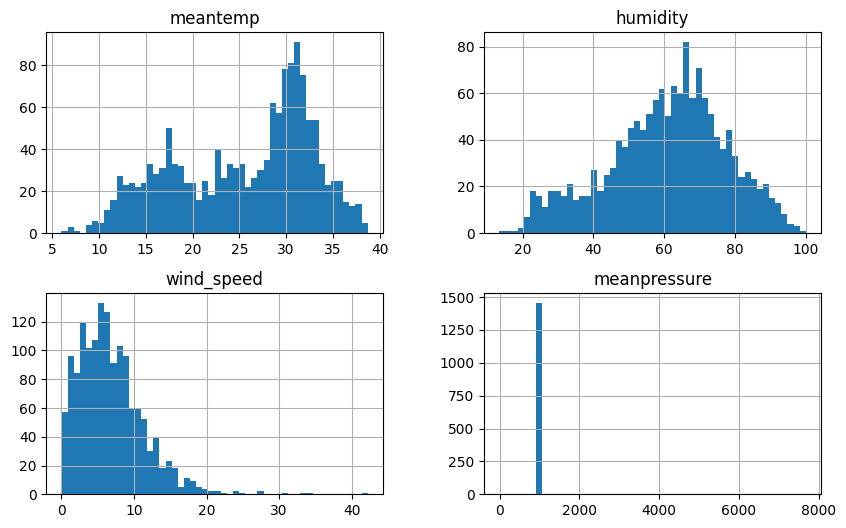

In [ ]:
# histogram for distribution
climate_train_df.hist(bins=50, figsize=(10,6))
plt.show()

A histogram represents the distribution of data, showing how many data points fall within each bin. It provides a quick way to visualize the data's underlying patterns, making it easier to understand the overall distribution at a glance.

#### **Pairplot**


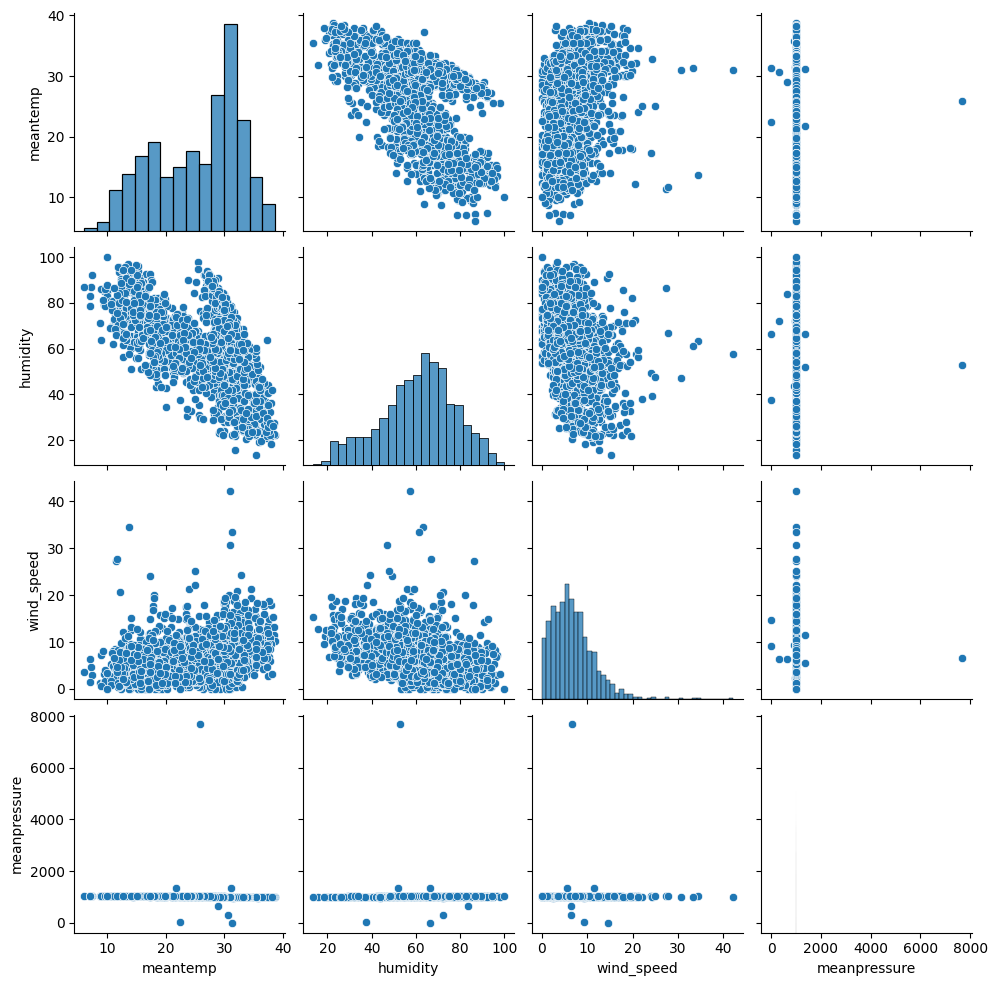

In [ ]:
# pairplot of all numerical variables
sns.pairplot(climate_train_df)

In a pair plot, each variable is plotted against every other variable, allowing for a clear view of relationships, trends, or patterns among the variables.

#### **Correlation heatmap**

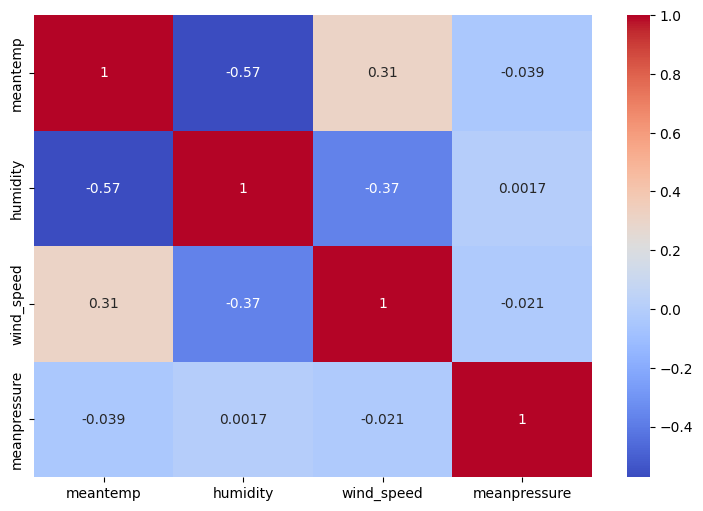

In [ ]:
plt.figure(figsize=(9, 6))

# Selecting the required columns for correlation
subset = climate_train_df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]

# Plotting the correlation heatmap
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm')

plt.show()


The correlation heatmap is a graphical representation of the correlation matrix, showing the strength and direction of relationships between numeric variables.



#### **Visualization the data**

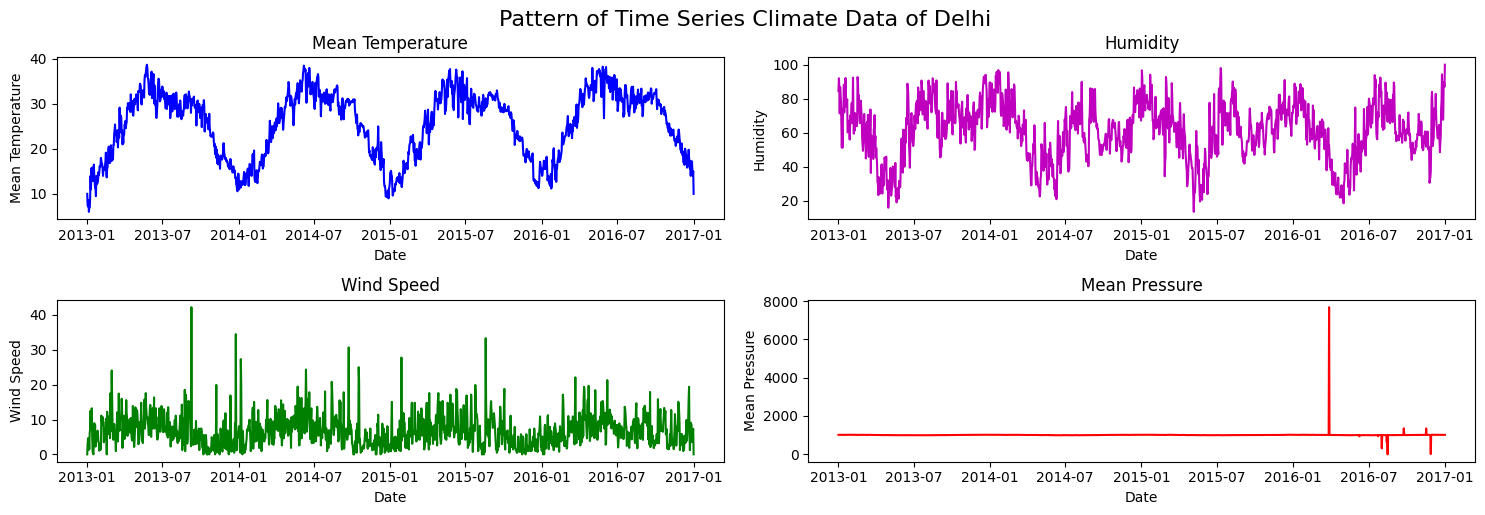

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime if not already done
climate_train_df['date'] = pd.to_datetime(climate_train_df['date'])

# Define the figure and subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

# Plot each feature in a separate subplot with different colors
axs[0, 0].plot(climate_train_df['date'], climate_train_df['meantemp'], color='b')
axs[0, 0].set_title('Mean Temperature')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Mean Temperature')

axs[0, 1].plot(climate_train_df['date'], climate_train_df['humidity'], color='m')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Humidity')

axs[1, 0].plot(climate_train_df['date'], climate_train_df['wind_speed'], color='g')
axs[1, 0].set_title('Wind Speed')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Wind Speed')

axs[1, 1].plot(climate_train_df['date'], climate_train_df['meanpressure'], color='r')
axs[1, 1].set_title('Mean Pressure')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Mean Pressure')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.suptitle('Pattern of Time Series Climate Data of Delhi', fontsize=16, y=1.02)
plt.show()



The visualization reveals that certain variables, such as 'wind_speed' and 'meanpressure', contain outliers. It is essential to review all variables and preprocess them as needed.

### **Data Preprocessing of train data**

#### **Check the missing and duplicate data**

In [ ]:
# check for duplicate data
print(f'\nDuplicate data: {climate_train_df.duplicated().sum()}')

# check the missing data
print(f'\nMissing values:\n{climate_train_df.isnull().sum()}')


Duplicate data: 0

Missing values:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


There are no duplicate as well as missing data in the trainning data.

#### **Process the Outliers**


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class TrainOutlierProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, columns, threshold=2, window_size=30):
        self.columns = columns
        self.threshold = threshold
        self.window_size = window_size
        self.outliers = {}
        self.bounds = {}
        self.input_data = {}
        self.output_data = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy, self.outliers, self.bounds = self.detect_and_process_local_outliers(X_copy, self.columns)
        return X_copy

    def detect_and_process_local_outliers(self, X, columns):
        X_copy = X.copy()
        outliers_dict = {}
        bounds_dict = {}

        for col in columns:
            self.input_data[col] = X_copy[col].copy()  # Store the input data for this column

            # Step 1: Compute initial rolling statistics (mean, std) and bounds
            rolling_mean = X_copy[col].rolling(window=self.window_size, min_periods=1, center=True).mean()
            rolling_std = X_copy[col].rolling(window=self.window_size, min_periods=1, center=True).std()

            lower_bounds = rolling_mean - self.threshold * rolling_std
            upper_bounds = rolling_mean + self.threshold * rolling_std
            bounds_dict[col] = (lower_bounds, upper_bounds)

            # Step 2: Detect outliers using z-scores
            z_scores = (X_copy[col] - rolling_mean) / rolling_std
            outlier_mask = np.abs(z_scores) > self.threshold
            outliers_dict[col] = X_copy.loc[outlier_mask, col].dropna().index.tolist()

            # Step 3: Recompute rolling statistics excluding detected outliers
            for index in outliers_dict[col]:
                # Temporarily exclude the outlier from the column data for recomputation
                temp_data = X_copy[col].copy()
                temp_data.loc[index] = np.nan  # Exclude the outlier by setting it to NaN temporarily

                # Recompute rolling mean and std excluding the outlier
                rolling_mean_excluded = temp_data.rolling(window=self.window_size, min_periods=1, center=True).mean()
                rolling_std_excluded = temp_data.rolling(window=self.window_size, min_periods=1, center=True).std()

                # Recompute bounds excluding the outlier
                lower_bounds_excluded = rolling_mean_excluded - self.threshold * rolling_std_excluded
                upper_bounds_excluded = rolling_mean_excluded + self.threshold * rolling_std_excluded

                bounds_dict[col] = (lower_bounds_excluded, upper_bounds_excluded)

                # Adjust the outlier by setting it to the closest bound
                if abs(X_copy.loc[index, col] - lower_bounds_excluded.iloc[index]) < abs(upper_bounds_excluded.iloc[index] - X_copy.loc[index, col]):
                    X_copy.loc[index, col] = lower_bounds_excluded.iloc[index]
                else:
                    X_copy.loc[index, col] = upper_bounds_excluded.iloc[index]

            self.output_data[col] = X_copy[col].copy()  # Store the output data for this column

        self.outliers = outliers_dict
        self.bounds = bounds_dict
        return X_copy, self.outliers, self.bounds

    def get_local_outliers_indices(self, column):
        return self.outliers.get(column, [])

    def get_bounds(self, column):
        return self.bounds.get(column, (None, None))

    def get_input_data(self, column):
        return self.input_data.get(column, None)

    def get_output_data(self, column):
        return self.output_data.get(column, None)


In [ ]:
# Apply the function to each variable
climate_train_data = climate_train_df.copy()  # Make a copy to avoid modifying the original

columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
train_outlier_processor = TrainOutlierProcessor(columns)
climate_train_data = train_outlier_processor.fit_transform(climate_train_data)
#for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
#    climate_train_data = process_outliers_zscore(climate_train_data, col)

# Check how many rows remain after outlier removal
print(climate_train_data.shape)

(1462, 5)


#### **Visualize the local outliers**

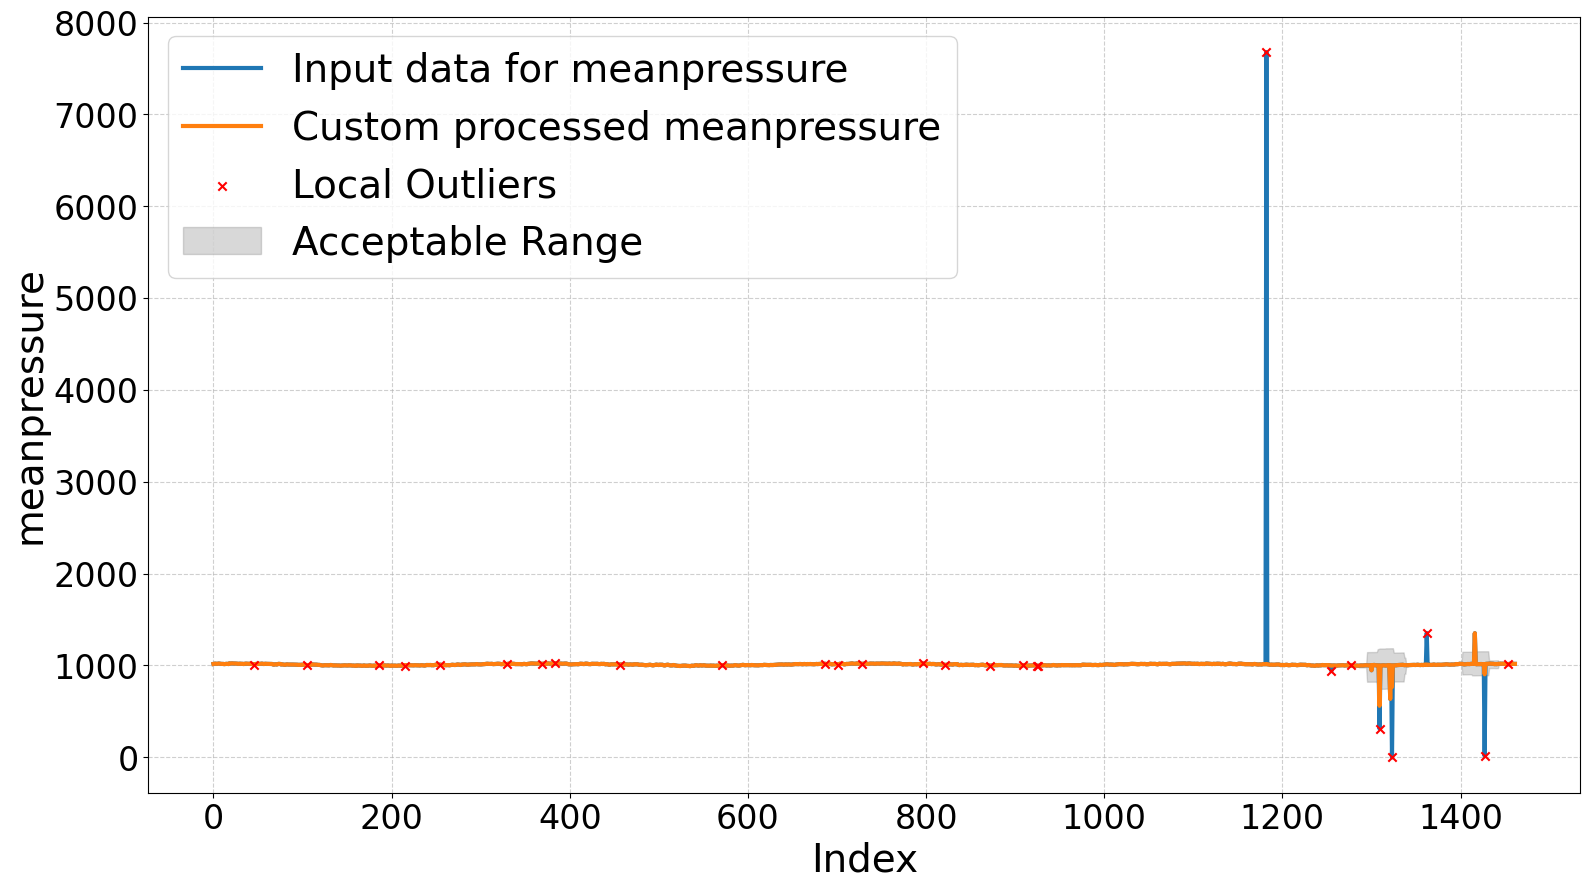

In [ ]:
# Visualizing local outliers detection and processing

def plot_local_outlier_processing(original_data, processed_data, column, outlier_processor, save_path, left_range=400, right_range=1000):
    """
    Visualizes the impact of local outlier processing on a specific column.

    Parameters:
    - original_data (DataFrame): The original dataset.
    - processed_data (DataFrame): The dataset after applying the custom preprocessing pipeline.
    - column (str): The column name to be visualized.
    - outlier_processor (CustomOutlierProcessor): The outlier processor instance used in the pipeline.
    - save_path (str): Path to save the plot.
    - left_range (int): Start index for the range to be plotted.
    - right_range (int): End index for the range to be plotted.
    """
    # Get the input and output data of the outlier processor for the column
    input_data = outlier_processor.get_input_data(column)
    output_data = outlier_processor.get_output_data(column)

    # Get the indices of the local outliers for the column
    outlier_indices = outlier_processor.get_local_outliers_indices(column)

    # Filter the outlier indices to be within the specified range
    filtered_outlier_indices = [idx for idx in outlier_indices if left_range <= (idx - input_data.index[0]) <= right_range]

    # Get the bounds for the column
    lower_bound, upper_bound = outlier_processor.get_bounds(column)

    # Set the figure size
    fig, ax = plt.subplots(figsize=(16, 9))

    # Plot the data with increased line width
    ax.plot(input_data.loc[left_range:right_range], label=f"Input data for {column}", linewidth=3)
    ax.plot(output_data.loc[left_range:right_range], label=f"Custom processed {column}", linewidth=3)

    # Highlight the outliers
    plt.scatter(filtered_outlier_indices, input_data.loc[filtered_outlier_indices], marker='x', color='red', label='Local Outliers', zorder=5)

    # Add shaded area for the bounds
    plt.fill_between(input_data.loc[left_range:right_range].index, lower_bound.loc[left_range:right_range], upper_bound.loc[left_range:right_range], color='gray', alpha=0.3, label='Acceptable Range')

    # Add legend with larger font size and bold labels
    ax.legend(fontsize=28)

    # Add grid
    ax.grid(True, linestyle='--', alpha=0.6)

    # Add axis labels with larger font size and bold text
    ax.set_xlabel('Index', fontsize=28)
    ax.set_ylabel(f"{column}", fontsize=28)

    # Customize ticks
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.yaxis.offsetText.set_fontsize(24)

    # Save the plot with high resolution
    plt.tight_layout()
    plt.savefig(save_path, format='pdf')

    # Display the plot
    plt.show()

# Call the function to generate and save the plot

plot_local_outlier_processing(
    climate_train_df,
    climate_train_data,
    column='meanpressure',
    outlier_processor=train_outlier_processor,
    save_path='local_outlier_processing_plot_meanpressure.pdf',
    left_range=0,
    right_range=1462
)


Even after removing local outliers of the variable 'meanpressure' of the train data, it shows quite unrealistic. I remove the some particular indices, replace NaN and then linear interpolate. I manually remove the values of the indices of 1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427 of 'meanpressure' and then replace NaN and interpolate linearly.

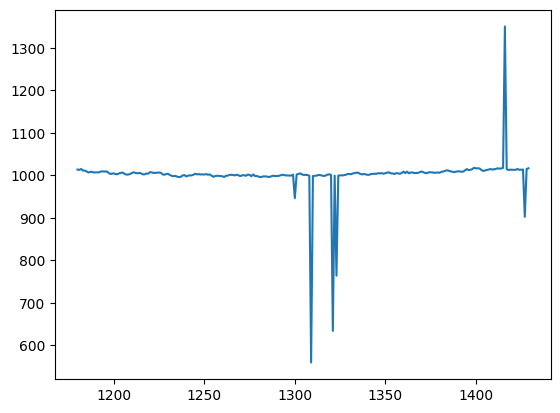

In [ ]:
plt.plot(climate_train_data['meanpressure'].iloc[1180:1430])
plt.show()

In [ ]:
# I remove the some particular indices, replace NaN and then linear interpolate
climate_train_data.loc[[1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427], 'meanpressure'] = np.nan

# Verify if the values have been set to NaN
print(climate_train_data.loc[[1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427], 'meanpressure'])

# Interpolate the NaN values in the 'meanpressure' column
climate_train_data['meanpressure'] = climate_train_data['meanpressure'].interpolate(method = 'linear')

# Verify if NaN values have been interpolated
print(climate_train_data.loc[[1182, 1255, 1300, 1309, 1321, 1323, 1362, 1416, 1427], 'meanpressure'])



1182   NaN
1255   NaN
1300   NaN
1309   NaN
1321   NaN
1323   NaN
1362   NaN
1416   NaN
1427   NaN
Name: meanpressure, dtype: float64
1182    1012.062500
1255     998.732143
1300    1001.750000
1309     998.812500
1321    1000.178571
1323     999.402116
1362    1005.052019
1416    1016.115385
1427    1014.295455
Name: meanpressure, dtype: float64


#### **Visualize the data after data preprocessing**
##### After outlier processing of the data, we again visualize the data.

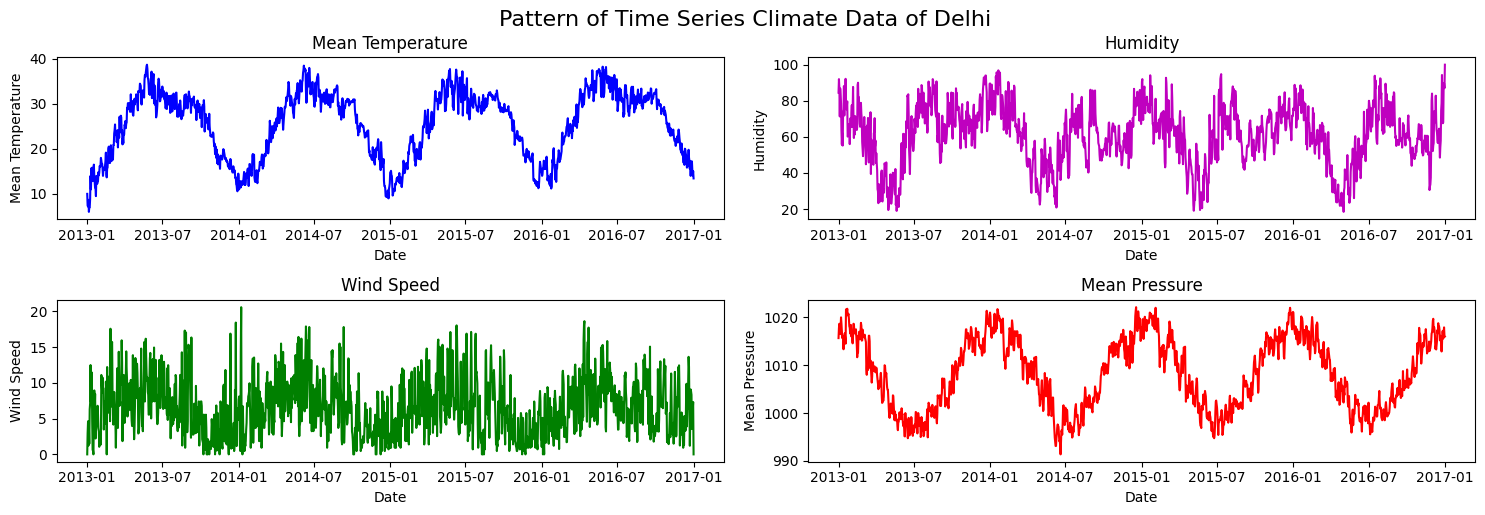

In [ ]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime if not already done
climate_train_data['date'] = pd.to_datetime(climate_train_data['date'])

# Define the figure and subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 5))

# Plot each feature in a separate subplot with different colors
axs[0, 0].plot(climate_train_data['date'], climate_train_data['meantemp'], color='b')
axs[0, 0].set_title('Mean Temperature')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Mean Temperature')

axs[0, 1].plot(climate_train_data['date'], climate_train_data['humidity'], color='m')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Humidity')

axs[1, 0].plot(climate_train_data['date'], climate_train_data['wind_speed'], color='g')
axs[1, 0].set_title('Wind Speed')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Wind Speed')

axs[1, 1].plot(climate_train_data['date'], climate_train_data['meanpressure'], color='r')
axs[1, 1].set_title('Mean Pressure')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Mean Pressure')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.suptitle('Pattern of Time Series Climate Data of Delhi', fontsize=16, y=1.02)
plt.show()



#### **Seasonal decomposition**

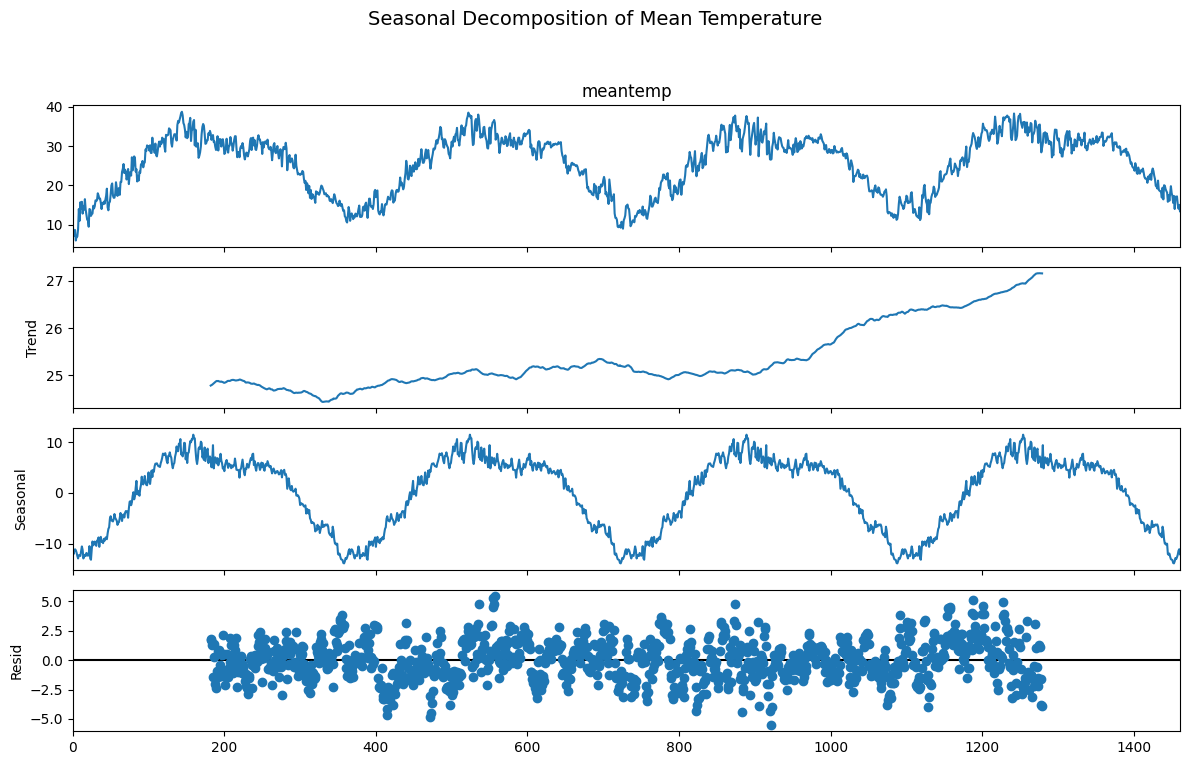

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the 'meantemp' time series
decomposition = seasonal_decompose(climate_train_data['meantemp'], period=365, model='additive')

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(12, 8)

# Add a title
plt.suptitle('Seasonal Decomposition of Mean Temperature', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


#### **Moving Average**

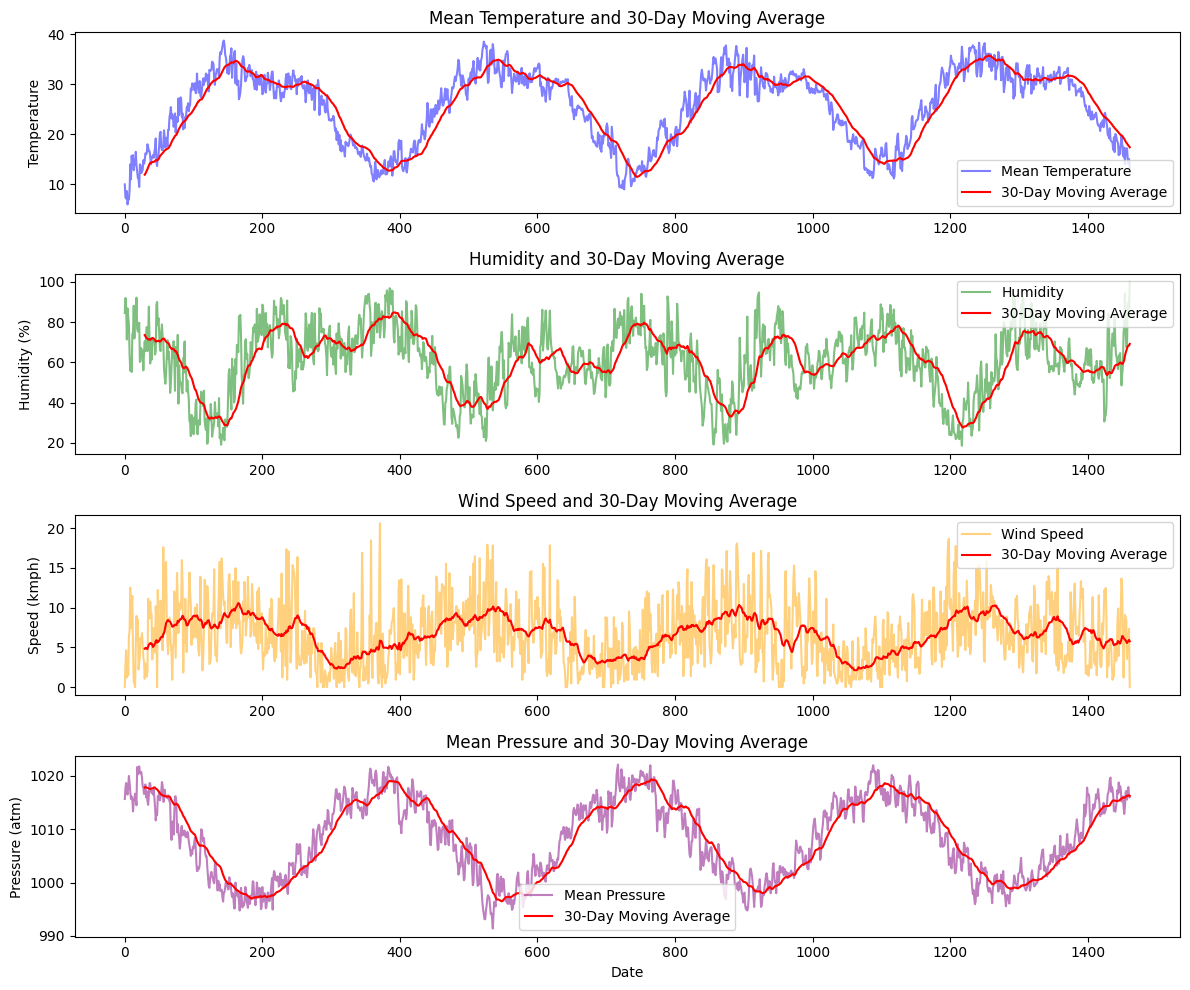

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the 30-day moving average for each variable
climate_train_data['mean_temp_MA'] = climate_train_data['meantemp'].rolling(window=30).mean()
climate_train_data['humidity_MA'] = climate_train_data['humidity'].rolling(window=30).mean()
climate_train_data['wind_speed_MA'] = climate_train_data['wind_speed'].rolling(window=30).mean()
climate_train_data['meanpressure_MA'] = climate_train_data['meanpressure'].rolling(window=30).mean()

# Plot the original data and the moving averages for each variable
plt.figure(figsize=(12, 10))

# Mean Temperature
plt.subplot(4, 1, 1)
plt.plot(climate_train_data['meantemp'], label='Mean Temperature', color='blue', alpha=0.5)
plt.plot(climate_train_data['mean_temp_MA'], label='30-Day Moving Average', color='red')
plt.title('Mean Temperature and 30-Day Moving Average')
plt.ylabel('Temperature')
plt.legend()

# Humidity
plt.subplot(4, 1, 2)
plt.plot(climate_train_data['humidity'], label='Humidity', color='green', alpha=0.5)
plt.plot(climate_train_data['humidity_MA'], label='30-Day Moving Average', color='red')
plt.title('Humidity and 30-Day Moving Average')
plt.ylabel('Humidity (%)')
plt.legend()

# Wind Speed
plt.subplot(4, 1, 3)
plt.plot(climate_train_data['wind_speed'], label='Wind Speed', color='orange', alpha=0.5)
plt.plot(climate_train_data['wind_speed_MA'], label='30-Day Moving Average', color='red')
plt.title('Wind Speed and 30-Day Moving Average')
plt.ylabel('Speed (kmph)')
plt.legend()

# Mean Pressure
plt.subplot(4, 1, 4)
plt.plot(climate_train_data['meanpressure'], label='Mean Pressure', color='purple', alpha=0.5)
plt.plot(climate_train_data['meanpressure_MA'], label='30-Day Moving Average', color='red')
plt.title('Mean Pressure and 30-Day Moving Average')
plt.ylabel('Pressure (atm)')
plt.xlabel('Date')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


### **Correlation heatmap**

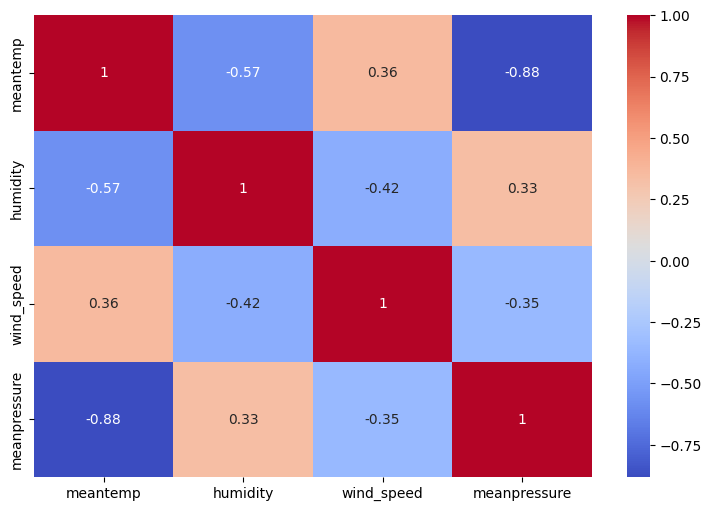

In [ ]:
plt.figure(figsize=(9, 6))

# Selecting the required columns for correlation
subset_1 = climate_train_data[['meantemp', 'humidity', 'wind_speed', 'meanpressure']]

# Plotting the correlation heatmap
sns.heatmap(subset_1.corr(), annot=True, cmap='coolwarm')

plt.show()


#### **Normalize the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
climate_train_data[columns] = scaler.fit_transform(climate_train_data[columns])

# Check the scaled data
print(climate_train_data[columns].head())


   meantemp  humidity  wind_speed  meanpressure
0 -2.110815  1.430090   -1.658894      0.997540
1 -2.464758  1.881103   -0.909332      1.284804
2 -2.496522  1.580428   -0.493468      1.401505
3 -2.292324  0.638311   -1.348673      1.199522
4 -2.655342  1.570405   -0.728230      1.109752


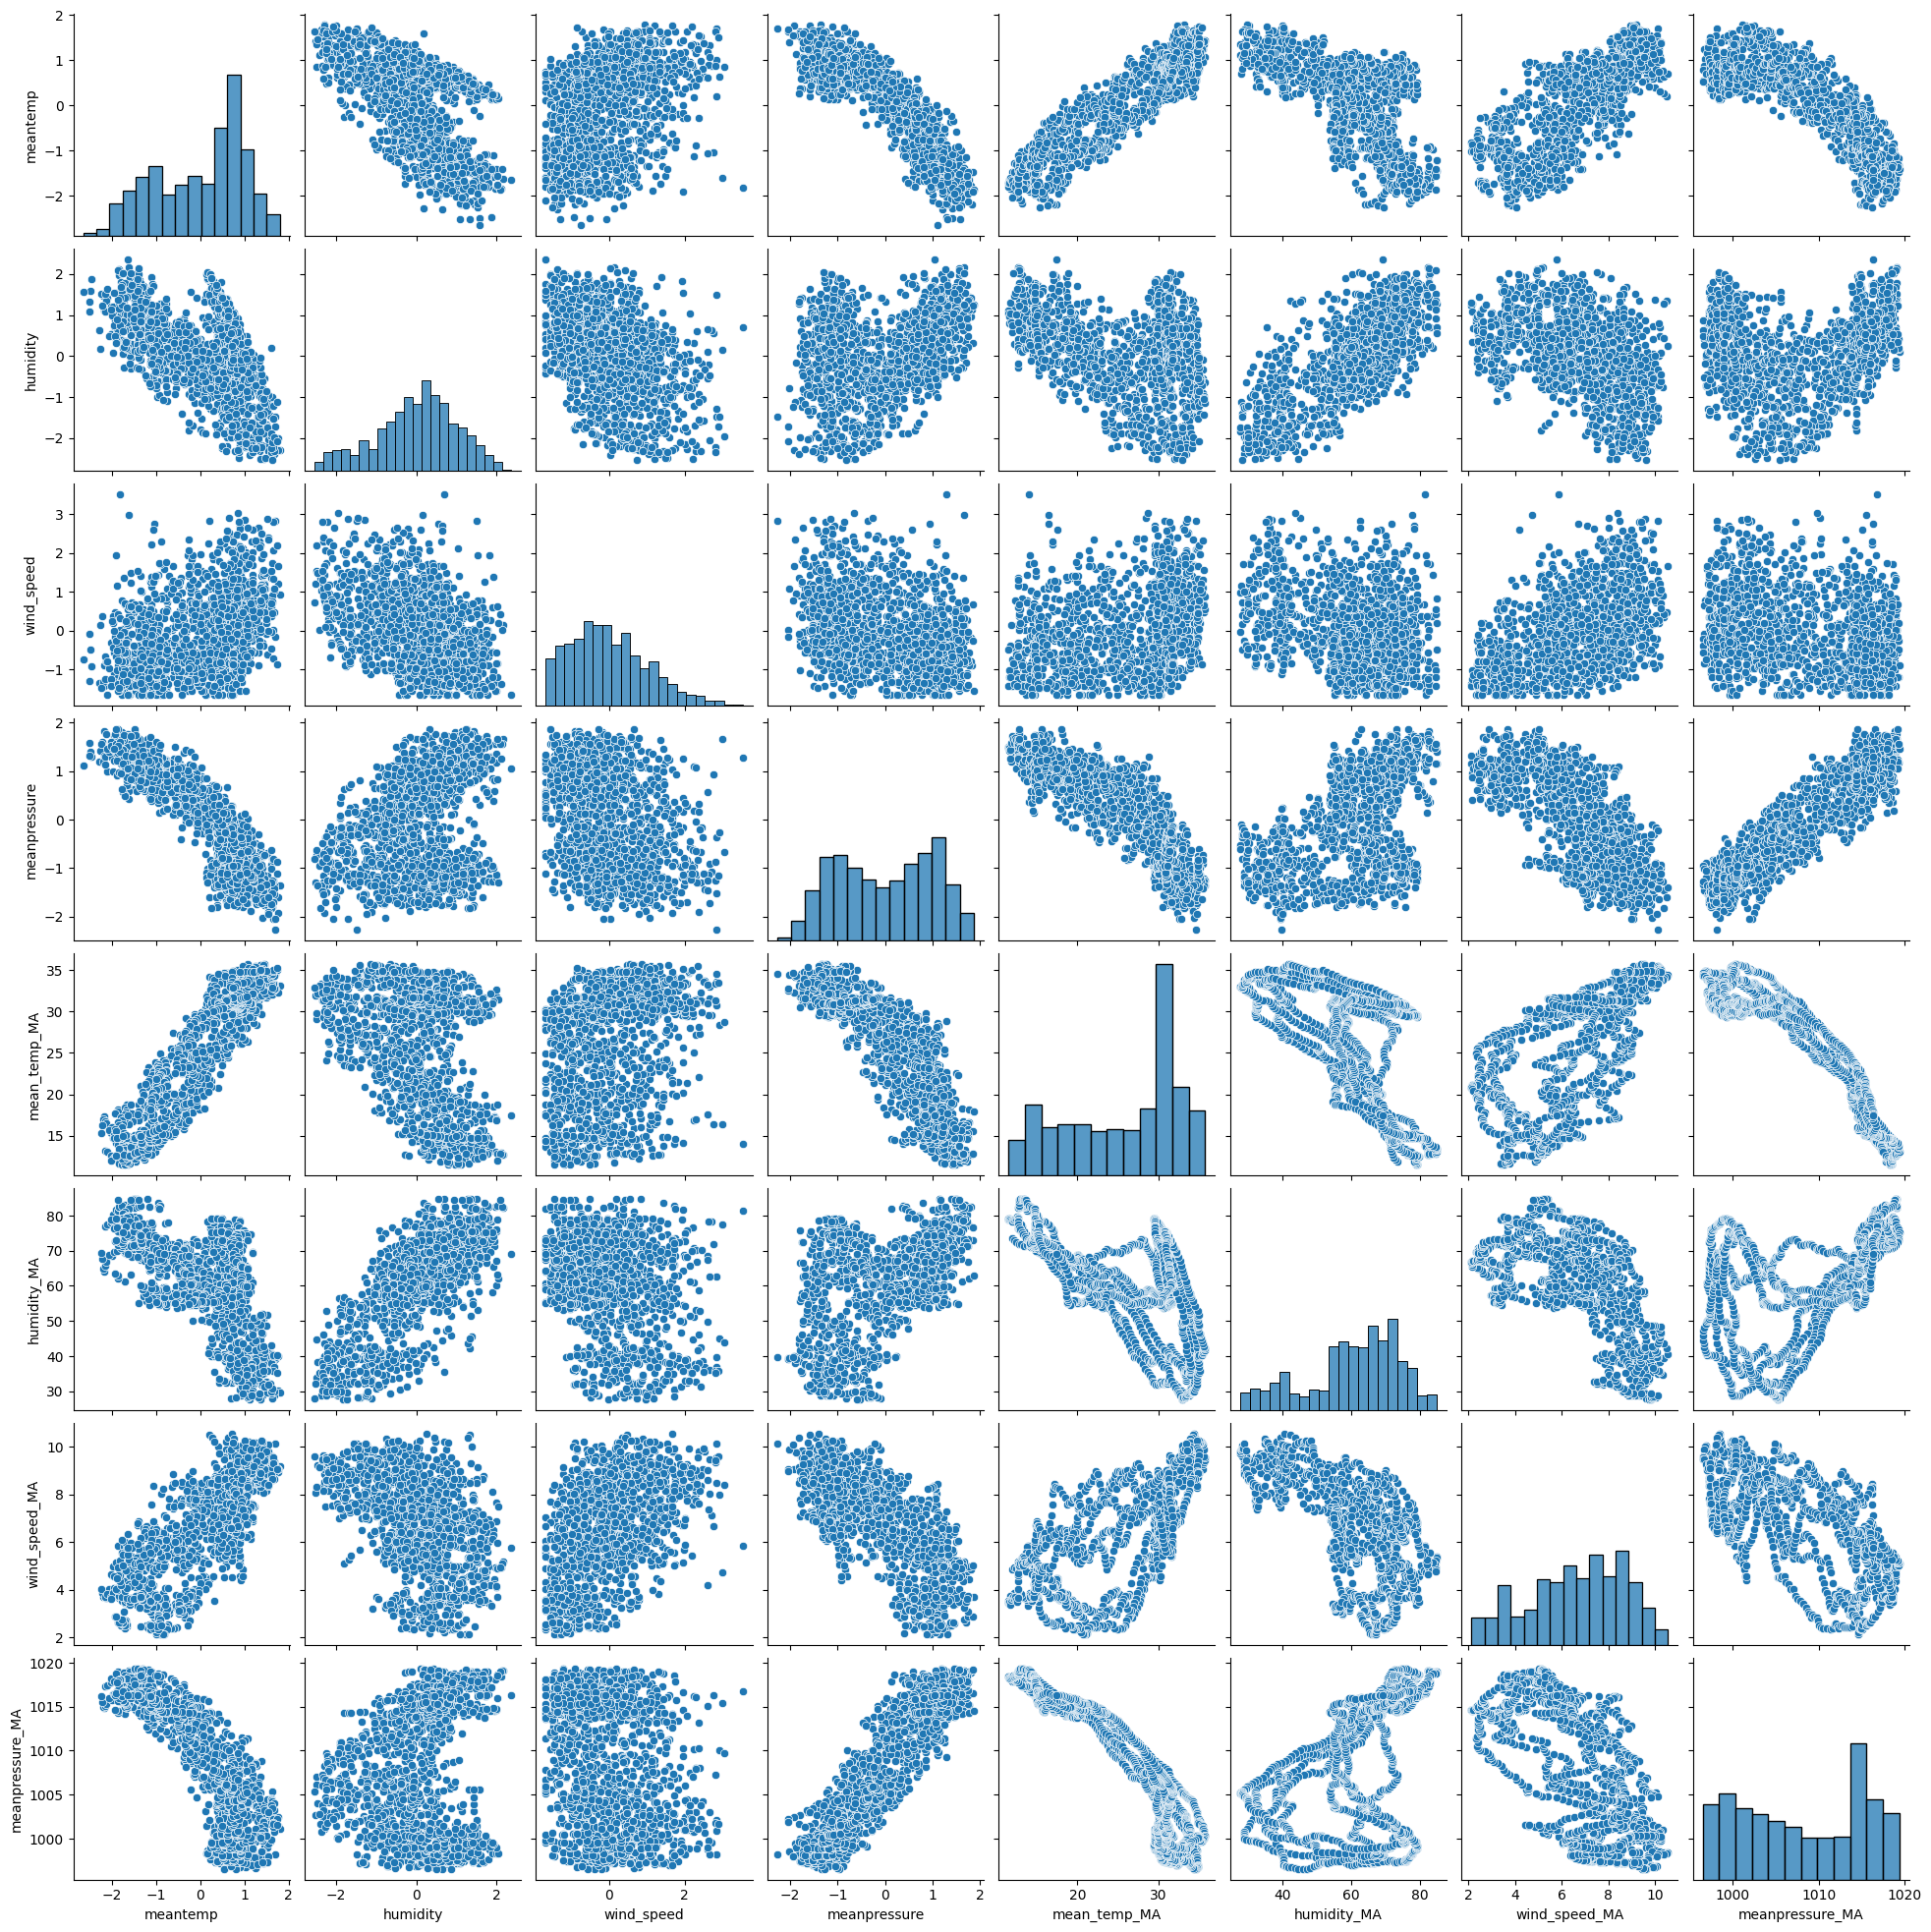

In [ ]:
# after data preprocessing pairplot of all numerical variables
sns.pairplot(climate_train_data)

## **Test Data**

In [ ]:
climate_test_df = df_test.copy()

### **Check the missing data**

In [ ]:
climate_test_df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### **visualize the data for outlier checking**

In [ ]:
climate_test_df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

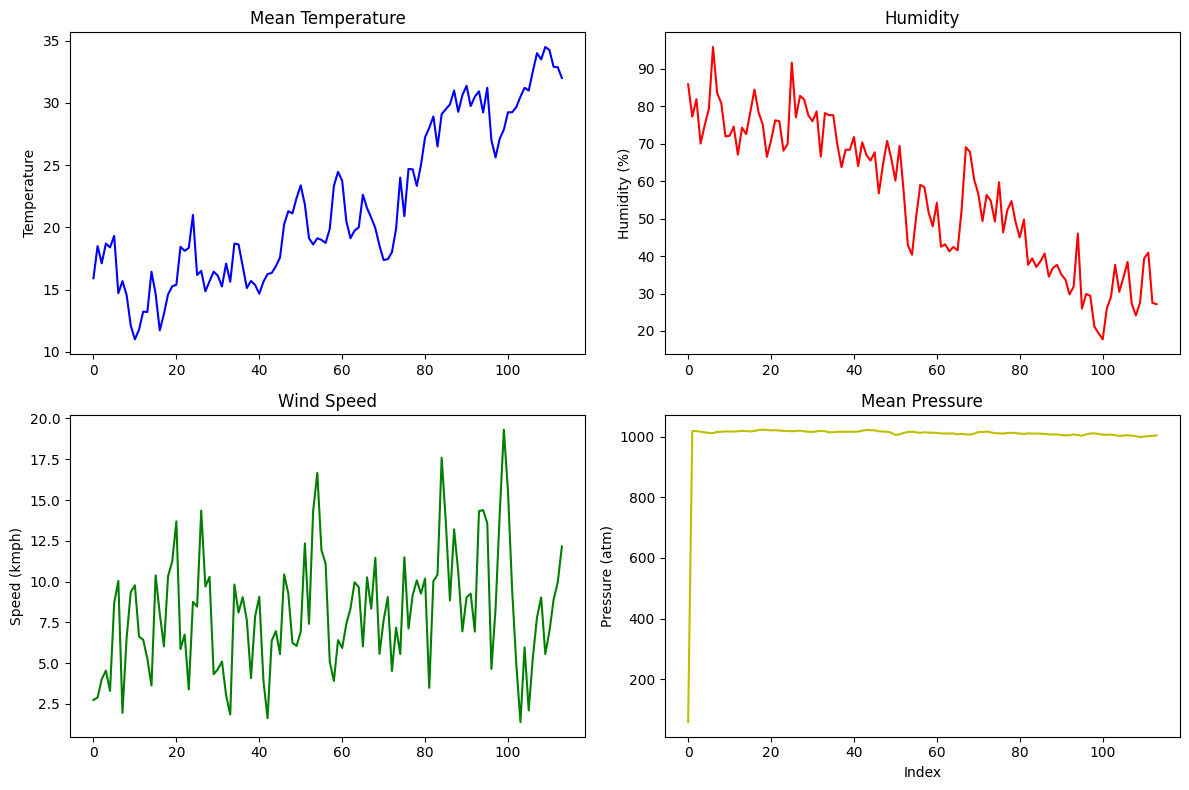

In [ ]:
import matplotlib.pyplot as plt

# Create subplots: 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 'mean_temp'
axs[0, 0].plot(climate_test_df['meantemp'], color='b')
axs[0, 0].set_title('Mean Temperature')
axs[0, 0].set_ylabel('Temperature')

# Plot 'humidity'
axs[0, 1].plot(climate_test_df['humidity'], color='r')
axs[0, 1].set_title('Humidity')
axs[0, 1].set_ylabel('Humidity (%)')

# Plot 'wind_speed'
axs[1, 0].plot(climate_test_df['wind_speed'], color='g')
axs[1, 0].set_title('Wind Speed')
axs[1, 0].set_ylabel('Speed (kmph)')

# Plot 'meanpressure'
axs[1, 1].plot(climate_test_df['meanpressure'], color='y')
axs[1, 1].set_title('Mean Pressure')
axs[1, 1].set_ylabel('Pressure (atm)')
axs[1, 1].set_xlabel('Index')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### **Process the outliers**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class TestOutlierProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, columns, threshold=2, window_size=30):
        self.columns = columns
        self.threshold = threshold
        self.window_size = window_size
        self.outliers = {}
        self.bounds = {}
        self.input_data = {}
        self.output_data = {}

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy, self.outliers, self.bounds = self.detect_and_process_local_outliers(X_copy, self.columns)
        return X_copy

    def detect_and_process_local_outliers(self, X, columns):
        X_copy = X.copy()
        outliers_dict = {}
        bounds_dict = {}

        for col in columns:
            self.input_data[col] = X_copy[col].copy()  # Store the input data for this column

            # Step 1: Compute initial rolling statistics (mean, std) and bounds
            rolling_mean = X_copy[col].rolling(window=self.window_size, min_periods=1, center=True).mean()
            rolling_std = X_copy[col].rolling(window=self.window_size, min_periods=1, center=True).std()

            lower_bounds = rolling_mean - self.threshold * rolling_std
            upper_bounds = rolling_mean + self.threshold * rolling_std
            bounds_dict[col] = (lower_bounds, upper_bounds)

            # Step 2: Detect outliers using z-scores
            z_scores = (X_copy[col] - rolling_mean) / rolling_std
            outlier_mask = np.abs(z_scores) > self.threshold
            outliers_dict[col] = X_copy.loc[outlier_mask, col].dropna().index.tolist()

            # Step 3: Recompute rolling statistics excluding detected outliers
            for index in outliers_dict[col]:
                # Temporarily exclude the outlier from the column data for recomputation
                temp_data = X_copy[col].copy()
                temp_data.loc[index] = np.nan  # Exclude the outlier by setting it to NaN temporarily

                # Recompute rolling mean and std excluding the outlier
                rolling_mean_excluded = temp_data.rolling(window=self.window_size, min_periods=1, center=True).mean()
                rolling_std_excluded = temp_data.rolling(window=self.window_size, min_periods=1, center=True).std()

                # Recompute bounds excluding the outlier
                lower_bounds_excluded = rolling_mean_excluded - self.threshold * rolling_std_excluded
                upper_bounds_excluded = rolling_mean_excluded + self.threshold * rolling_std_excluded

                bounds_dict[col] = (lower_bounds_excluded, upper_bounds_excluded)

                # Adjust the outlier by setting it to the closest bound
                if abs(X_copy.loc[index, col] - lower_bounds_excluded.iloc[index]) < abs(upper_bounds_excluded.iloc[index] - X_copy.loc[index, col]):
                    X_copy.loc[index, col] = lower_bounds_excluded.iloc[index]
                else:
                    X_copy.loc[index, col] = upper_bounds_excluded.iloc[index]

            self.output_data[col] = X_copy[col].copy()  # Store the output data for this column

        self.outliers = outliers_dict
        self.bounds = bounds_dict
        return X_copy, self.outliers, self.bounds

    def get_local_outliers_indices(self, column):
        return self.outliers.get(column, [])

    def get_bounds(self, column):
        return self.bounds.get(column, (None, None))

    def get_input_data(self, column):
        return self.input_data.get(column, None)

    def get_output_data(self, column):
        return self.output_data.get(column, None)


In [ ]:
# copy the data
climate_test_data = climate_test_df.copy()
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
test_outlier_processor = TestOutlierProcessor(columns)
climate_test_data = test_outlier_processor.fit_transform(climate_test_data)
#for col in ['meantemp', 'humidity', 'wind_speed', 'meanpressure']:
#    climate_train_data = process_outliers_zscore(climate_train_data, col)

# Check how many rows remain after outlier removal
print(climate_test_data.shape)

(114, 5)


### After preprocessing, visualization of 'meanpressure'

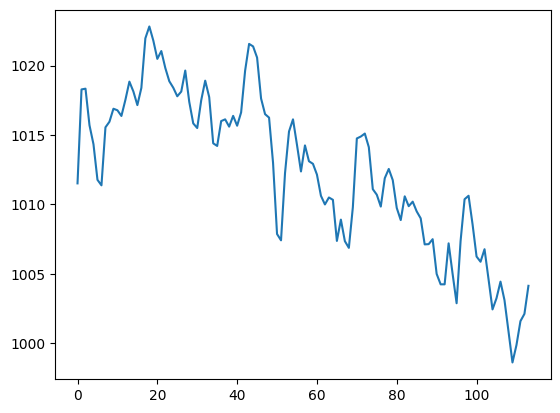

In [ ]:
plt.plot(climate_test_data['meanpressure'])

### **Normalize the data**

In [ ]:
# Define the columns to normalize
columns_to_normalize = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the test data
climate_test_data[columns_to_normalize] = scaler.fit_transform(climate_test_data[columns_to_normalize])

# Check the standardized test data
print(climate_test_data[columns_to_normalize].head())

   meantemp  humidity  wind_speed  meanpressure
0 -0.913584  1.595877   -1.567265     -0.156901
1 -0.505291  1.132830   -1.522813      1.044052
2 -0.724496  1.382720   -1.192374      1.053920
3 -0.473725  0.748772   -1.036806      0.586196
4 -0.522827  1.010860   -1.403397      0.343453


## **Exploration of Target variable**

In [ ]:
target_variable = climate_train_data['meantemp']

### **Rolling Statistics Plot**

##### Plot a rolling mean and rolling standard deviation to check stationarity.

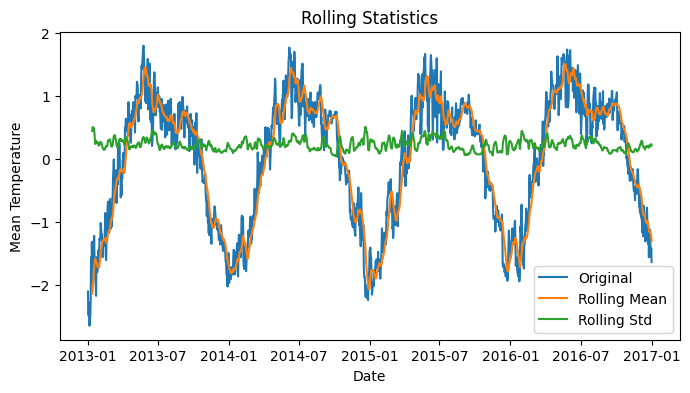

In [ ]:
climate_train_data['rolling_mean'] = climate_train_data['meantemp'].rolling(window=12).mean()
climate_train_data['rolling_std'] = climate_train_data['meantemp'].rolling(window=12).std()

plt.figure(figsize=(8, 4))
plt.plot(climate_train_data['date'], climate_train_data['meantemp'], label='Original')
plt.plot(climate_train_data['date'], climate_train_data['rolling_mean'], label='Rolling Mean')
plt.plot(climate_train_data['date'], climate_train_data['rolling_std'], label='Rolling Std')
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()


### **Autocorrelation Plot (ACF)**

#### These help to identify the dependency in lagged values. ACF is used to find correlation with past values and PACF helps in choosing AR terms.

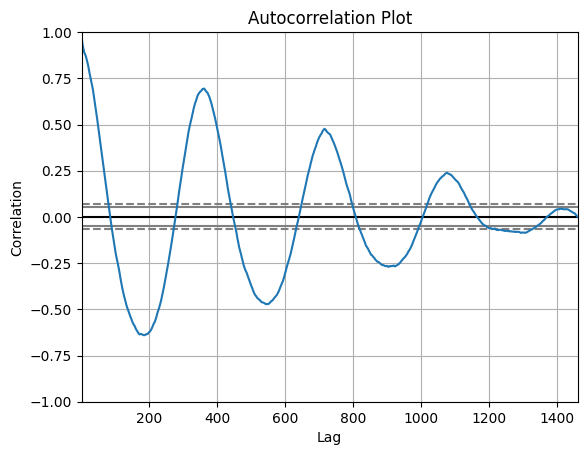

In [ ]:
pd.plotting.autocorrelation_plot(climate_train_data['meantemp'])
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()



**Explanation of auto-correlation plot:**

**x-axis:** The x-axis of the plot represents the lagged time periods. It typically shows a range of lag values (e.g., 0 to 200).

**y-axis:** The y-axis shows the correlation coefficients for each lag. The height of the bars (or the points) indicates the strength and direction of the autocorrelation.

**Confidence Intervals:** The dashed lines (often at ±2 standard errors) provide a confidence interval. If the autocorrelation value for a particular lag exceeds these bounds, it suggests a statistically significant correlation at that lag.

**Significant Autocorrelation:** If the autocorrelation is significantly positive at certain lags, it indicates that past values have a strong influence on future values, which can be useful for forecasting. Conversely, significant negative autocorrelation indicates a tendency for values to oscillate.

**Decay Pattern:** In many time series, autocorrelation decreases gradually with increasing lags (exponential decay), which may suggest the presence of a trend or seasonality.

If autocorrelation drops to zero quickly, it may indicate a more random process.

**Seasonality:**Regular peaks at specific lags (e.g., every 12 lags in monthly data) suggest seasonal patterns, indicating that the time series exhibits cyclical behavior.

### **Monthly Average Temparature**

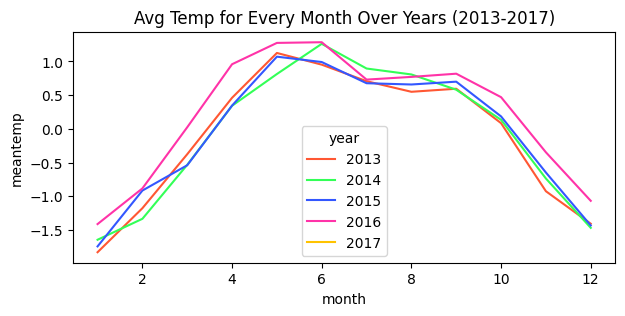

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data with a date column
# Ensure your date column is in datetime format
climate_train_data['date'] = pd.to_datetime(climate_train_data['date'])

# Extract year and month from the date column
climate_train_data['year'] = climate_train_data['date'].dt.year
climate_train_data['month'] = climate_train_data['date'].dt.month

# Define a custom bright color palette
bright_palette = sns.color_palette(['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#FFC300'])  # 5 bright colors

# Plotting
plt.figure(figsize=(7, 3))
sns.lineplot(data=climate_train_data, x='month', y='meantemp', hue='year', palette=bright_palette, errorbar=None)
plt.title('Avg Temp for Every Month Over Years (2013-2017)')
plt.show()


## **Models**

### **Time series models and techniques**

#### **a. Classical time series models**

**(i) ARIMA (AutoRegressive Integrated Moving Average):** It combines autoregression (AR), differencing (I), and moving average (MA) to handle non-stationary data.

**(ii) SARIMA (Seasonal ARIMA):** it is another good method as my data has seasonal components (e.g., yearly temperature cycles).

**(iii) Exponential Smoothing (ETS):** This model captures seasonality and trends by applying smoothing techniques.

#### **b. Machine Learning models**

**(i) Support Vector Regression (SVR):** SVR model captures the time series relationships by treating lag features as inputs.

**(ii) Random Forest and Gradient Boosting:** Ensemble models like Random Forest and Gradient Boosting can be used to predict time series by treating the lagged values as features.

#### **c. Prophet model**
 Developed by Facebook, Prophet is an easy-to-use model for forecasting time series with daily seasonality, yearly seasonality, and holiday effects.

#### **d. Neural Networks for Time Series**

**(i) Feedforward Neural Network (MLP):** A simple neural network with fully connected layers can be used for time series forecasting by feeding in lagged features as inputs.

**(ii) LSTM (Long Short-Term Memory):** LSTM is a type of recurrent neural network (RNN) ideal for time series data because it captures temporal dependencies.

**(iii) GRU (Gated Recurrent Unit):** Similar to LSTM but with a simpler architecture that can work well for time series.

#### **e. Hybrid models**

**(i) ARIMA + Machine Learning:** In this hybrid model, an ARIMA model is first used to capture the linear relationships in the data, and then the residuals (errors) from the ARIMA model are passed into a machine learning model to capture any remaining non-linear patterns.

**(ii) SARIMA + SVM:** This hybrid combines Seasonal ARIMA (SARIMA) to capture linear trends and seasonality, while Support Vector Regression (SVR) is used to model non-linearities present in the residuals from SARIMA.

**(iii) Exponential Smoothing + Neural Network:**
Exponential Smoothing models (ETS) can handle trends and seasonality, while a neural network (like a Multi-Layer Perceptron or LSTM) can model non-linear patterns in the residuals.

**(iv) ARIMA + LSTM:** ARIMA captures the linear components, while LSTM (Long Short-Term Memory networks) models the non-linear aspects of the time series.

**(v) Prophet + XGBoost:** In this model, Facebook's Prophet is used to model the trend and seasonality, while XGBoost is applied to capture residual non-linearities.

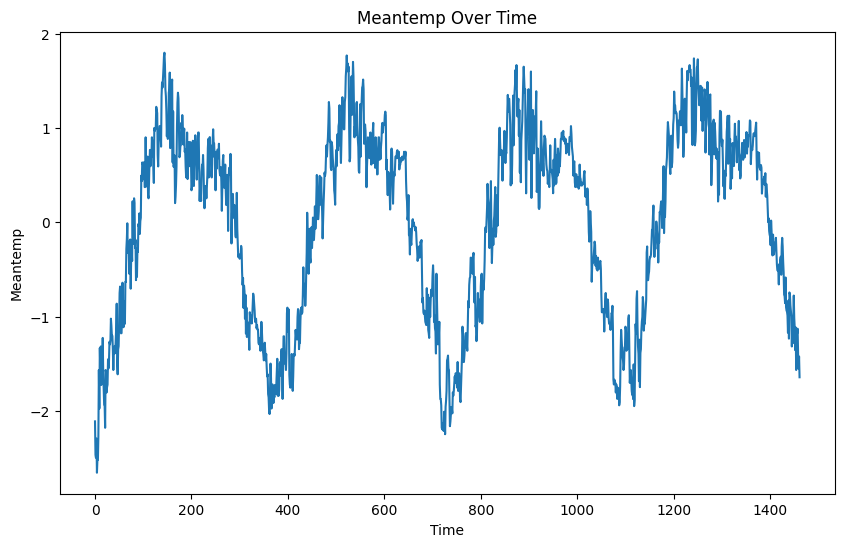

In [ ]:
import matplotlib.pyplot as plt

# Assuming meantemp is in climate_train_data
plt.figure(figsize=(10, 6))
plt.plot(climate_train_data['meantemp'])
plt.title('Meantemp Over Time')
plt.xlabel('Time')
plt.ylabel('Meantemp')
plt.show()


### **Split the data**

In [ ]:
### prepare the data

# Split data into features and target for training and testing
X_train = climate_train_data[['meanpressure', 'humidity', 'wind_speed']]
y_train = climate_train_data['meantemp']
X_test = climate_test_data[['meanpressure', 'humidity', 'wind_speed']]
y_test = climate_test_data['meantemp']

### **RFR**

Unlike traditional time series models, RFR does not require stationarity. As RFR is a non-parametric model, so it can capture complex, non-linear relationships in the data. By using multiple decision trees, Random Forest reduces overfitting and improves generalizability, which is beneficial for prediction accuracy.

In [ ]:
### Initialize and Fit the Model

# Initialize the Random Forest Regressor with parameters
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rfr_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
### make prediction on test set

# Predict the 'meantemp' for the test data
y_pred_rfr = rfr_model.predict(X_test)


In [ ]:
### Evaluate model performance

# Predict the 'meantemp' for the test data
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
rmse_rfr = np.sqrt(mse_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

# Print the evaluation metrics
print("Random Forest Regressor Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_rfr}")
print(f"Mean Squared Error (MSE): {mse_rfr}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr}")
print(f"R-squared (R²): {r2_rfr}")



Random Forest Regressor Evaluation:
Mean Absolute Error (MAE): 0.460185137098742
Mean Squared Error (MSE): 0.32775673381115666
Root Mean Squared Error (RMSE): 0.572500422542339
R-squared (R²): 0.6722432661888433


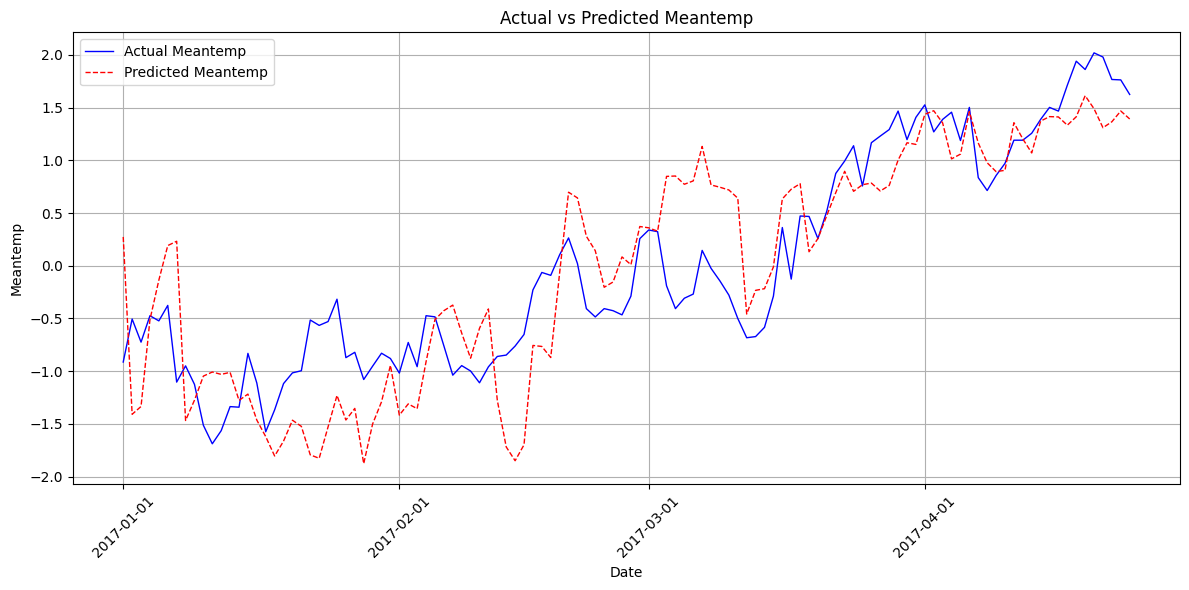

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


### line plot of the actual vs. predicted values
# Convert date column in test data to datetime if it's not already
climate_test_data['date'] = pd.to_datetime(climate_test_data['date'], dayfirst = True)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)
plt.plot(climate_test_data['date'], y_pred_rfr, label='Predicted Meantemp', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


### **XGBoost**

XGBoost Regressor Initial Evaluation:
MAE: 0.4491873615329191, MSE: 0.31375285450458745, RMSE: 0.5601364606099013, R2: 0.6862471454954124


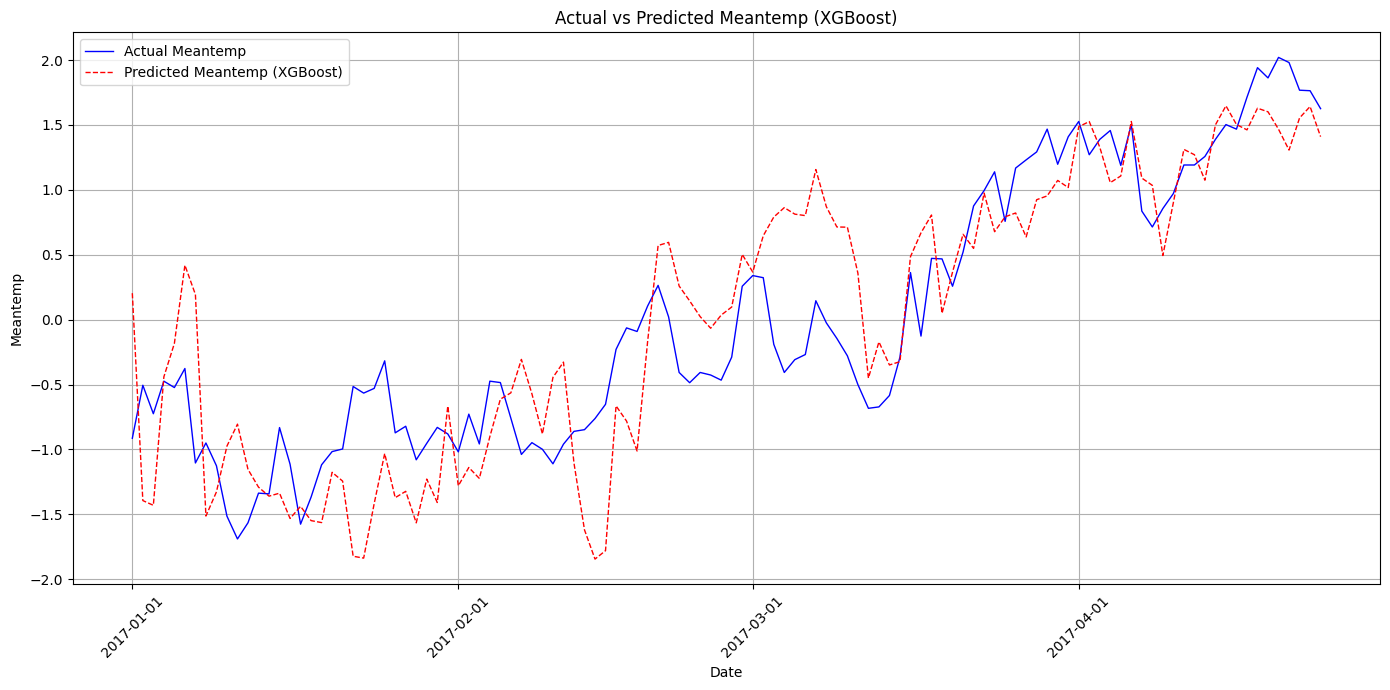

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from xgboost import XGBRegressor

# Prepare data for training and testing
X_train = climate_train_data[['meanpressure', 'humidity', 'wind_speed']]
y_train = climate_train_data['meantemp']
X_test = climate_test_data[['meanpressure', 'humidity', 'wind_speed']]
y_test = climate_test_data['meantemp']

### Initial XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate the initial model
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Initial Evaluation:")
print(f"MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}, R2: {r2_xgb}")

### Plotting Actual vs Predicted
# Convert date column in test data to datetime if it's not already
climate_test_data['date'] = pd.to_datetime(climate_test_data['date'], dayfirst=True)

plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)
# Plot predicted values
plt.plot(climate_test_data['date'], y_pred_xgb, label='Predicted Meantemp (XGBoost)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (XGBoost)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


### **SVM**

SVM Regressor Initial Evaluation:
MAE: 0.41922330166483074, MSE: 0.2725646245876277, RMSE: 0.5220772209047505, R2: 0.7274353754123722


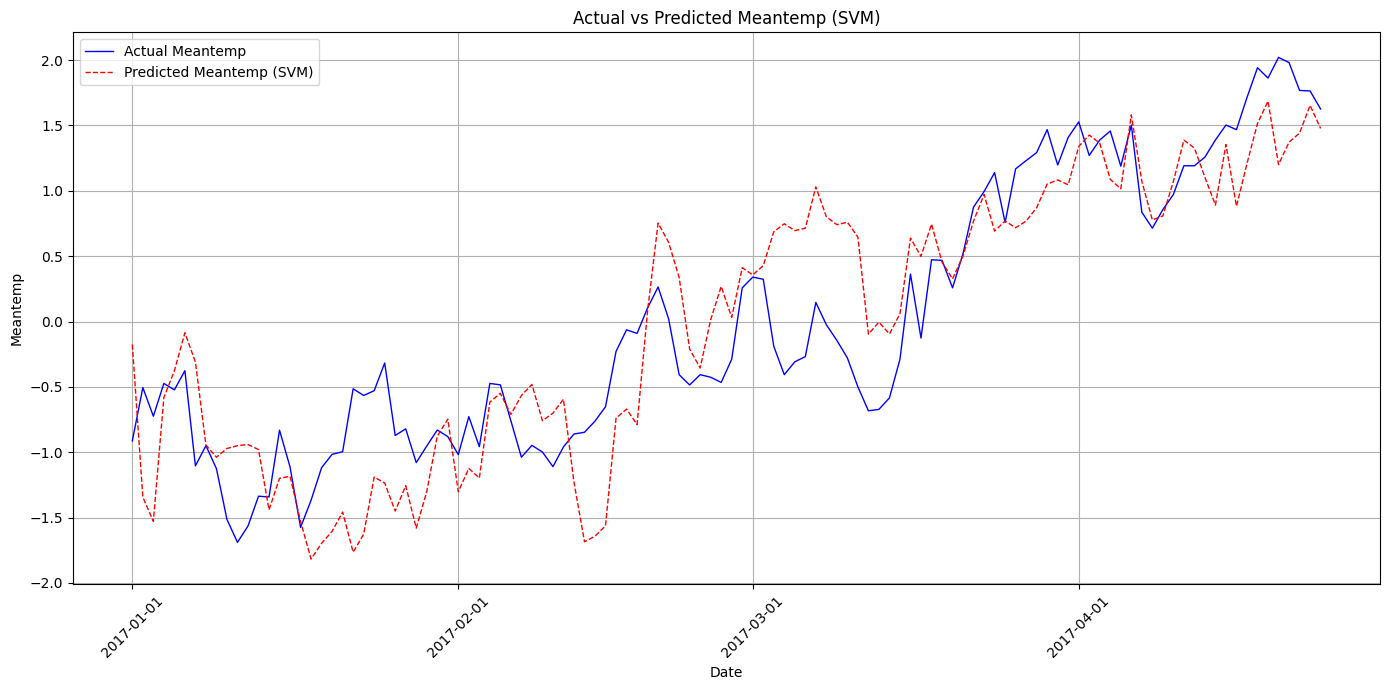

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.svm import SVR

# Prepare data for training and testing
X_train = climate_train_data[['meanpressure', 'humidity', 'wind_speed']]
y_train = climate_train_data['meantemp']
X_test = climate_test_data[['meanpressure', 'humidity', 'wind_speed']]
y_test = climate_test_data['meantemp']

### Initial SVM Regression Model
svm_model = SVR(kernel='rbf')  # You can choose different kernels such as 'linear', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict and evaluate the initial model
y_pred_svm = svm_model.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Regressor Initial Evaluation:")
print(f"MAE: {mae_svm}, MSE: {mse_svm}, RMSE: {rmse_svm}, R2: {r2_svm}")

### Plotting Actual vs Predicted
# Convert date column in test data to datetime if it's not already
climate_test_data['date'] = pd.to_datetime(climate_test_data['date'], dayfirst=True)

plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=1)
# Plot predicted values
plt.plot(climate_test_data['date'], y_pred_svm, label='Predicted Meantemp (SVM)', color='red', linestyle='--', linewidth=1)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (SVM)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


### **SImple NN**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Neural Network Regressor Initial Evaluation:
MAE: 0.39618381587263934, MSE: 0.2468753786393295, RMSE: 0.4968655538868935, R2: 0.7531246213606705


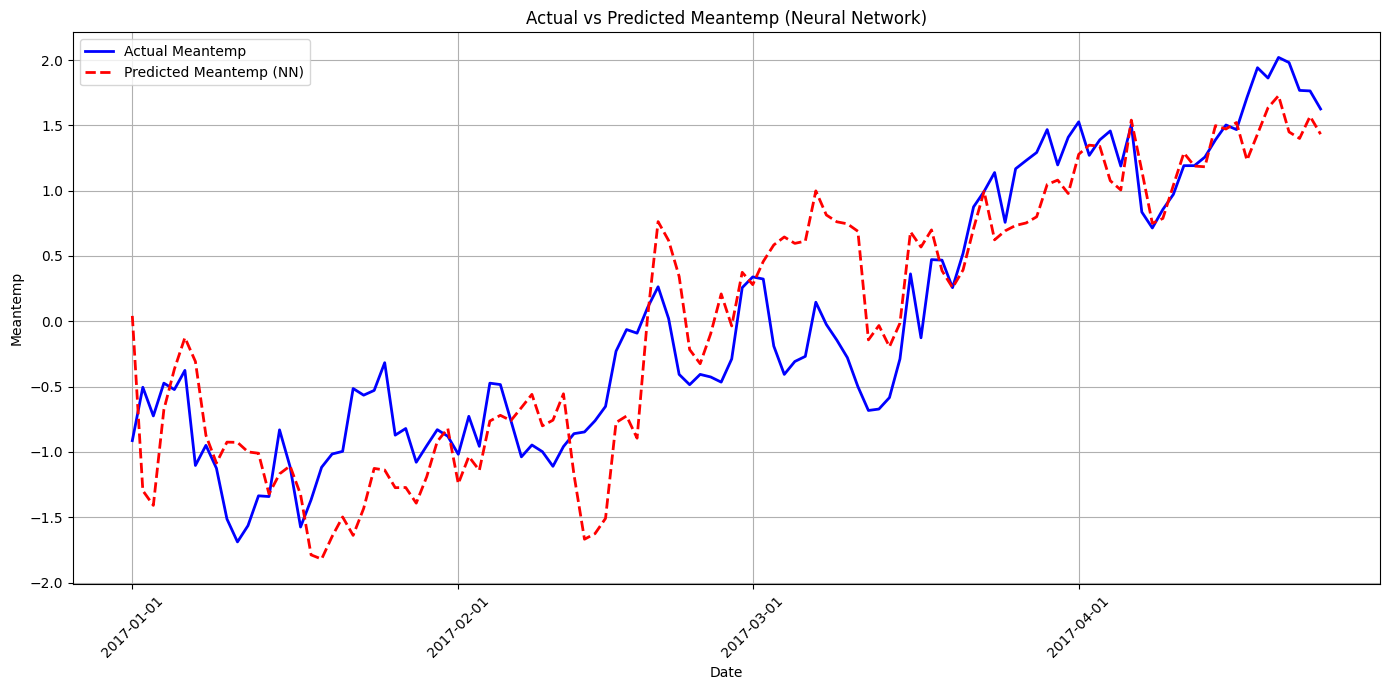

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Prepare data for training and testing
X_train = climate_train_data[['meanpressure', 'humidity', 'wind_speed']]
y_train = climate_train_data['meantemp']
X_test = climate_test_data[['meanpressure', 'humidity', 'wind_speed']]
y_test = climate_test_data['meantemp']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Initial Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))  # Input layer
nn_model.add(Dense(32, activation='relu'))  # Hidden layer
nn_model.add(Dense(1))  # Output layer

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=110, batch_size=50, verbose=0)  # Adjust epochs and batch size as needed

# Predict and evaluate the initial model
y_pred_nn = nn_model.predict(X_test_scaled)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Regressor Initial Evaluation:")
print(f"MAE: {mae_nn}, MSE: {mse_nn}, RMSE: {rmse_nn}, R2: {r2_nn}")

### Plotting Actual vs Predicted for Initial Model
# Convert date column in test data to datetime if it's not already
climate_test_data['date'] = pd.to_datetime(climate_test_data['date'], dayfirst=True)

plt.figure(figsize=(14, 7))

# Plot initial model predictions
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=2)
plt.plot(climate_test_data['date'], y_pred_nn, label='Predicted Meantemp (NN)', color='red', linestyle='--', linewidth=2)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (Neural Network)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


In [ ]:
pip install tensorflow


### **RNN**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
RNN Regressor Initial Evaluation:
MAE: 0.4031199507054865, MSE: 0.2557527030983595, RMSE: 0.5057199848714301, R2: 0.7442472969016405


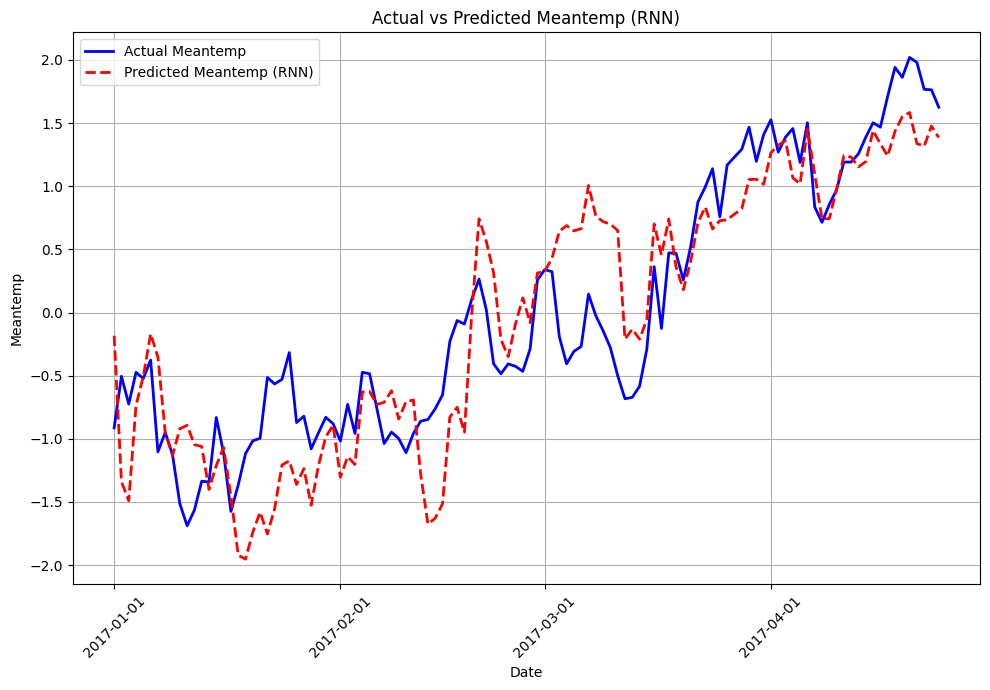

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Prepare data for training and testing
X_train = climate_train_data[['meanpressure', 'humidity', 'wind_speed']]
y_train = climate_train_data['meantemp']
X_test = climate_test_data[['meanpressure', 'humidity', 'wind_speed']]
y_test = climate_test_data['meantemp']

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data to 3D array (samples, time steps, features) for RNN input
time_steps = 1  # Set time steps, typically >1 for time series analysis
X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1]))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], time_steps, X_test_scaled.shape[1]))

### RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, activation='relu', input_shape=(time_steps, X_train_rnn.shape[2])))  # RNN layer
rnn_model.add(Dense(1))  # Output layer

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=100, batch_size=10, verbose=0)  # Adjust epochs and batch size as needed

# Predict and evaluate the RNN model
y_pred_rnn = rnn_model.predict(X_test_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

print("RNN Regressor Initial Evaluation:")
print(f"MAE: {mae_rnn}, MSE: {mse_rnn}, RMSE: {rmse_rnn}, R2: {r2_rnn}")

### Plotting Actual vs Predicted for RNN Model
# Convert date column in test data to datetime if it's not already
climate_test_data['date'] = pd.to_datetime(climate_test_data['date'], dayfirst=True)

plt.figure(figsize=(10, 7))

# Plot actual and RNN model predictions
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=2)
plt.plot(climate_test_data['date'], y_pred_rnn, label='Predicted Meantemp (RNN)', color='red', linestyle='--', linewidth=2)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (RNN)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


### **CNN**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 3, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 3, 32)           │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2496)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │          39,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,401 (181.25 KB)

 Trainable params: 46,401 (181.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0892 - val_loss: 0.0198
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0149 - val_loss: 0.0164
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0118 - val_loss: 0.0087
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0094 - val_loss: 0.0181
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0081 - val_loss: 0.0041
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0059 - val_loss: 0.0038
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - val_loss: 0.0093
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0066 - val_loss: 0.0037
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - val_loss: 0.0045
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0049 - val_loss: 0.0035
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 -

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
CNN Model Evaluation:
MAE: 0.4662104428683336, MSE: 0.40134562038079435, RMSE: 0.6335184451780346, R2: 0.5363221586100229


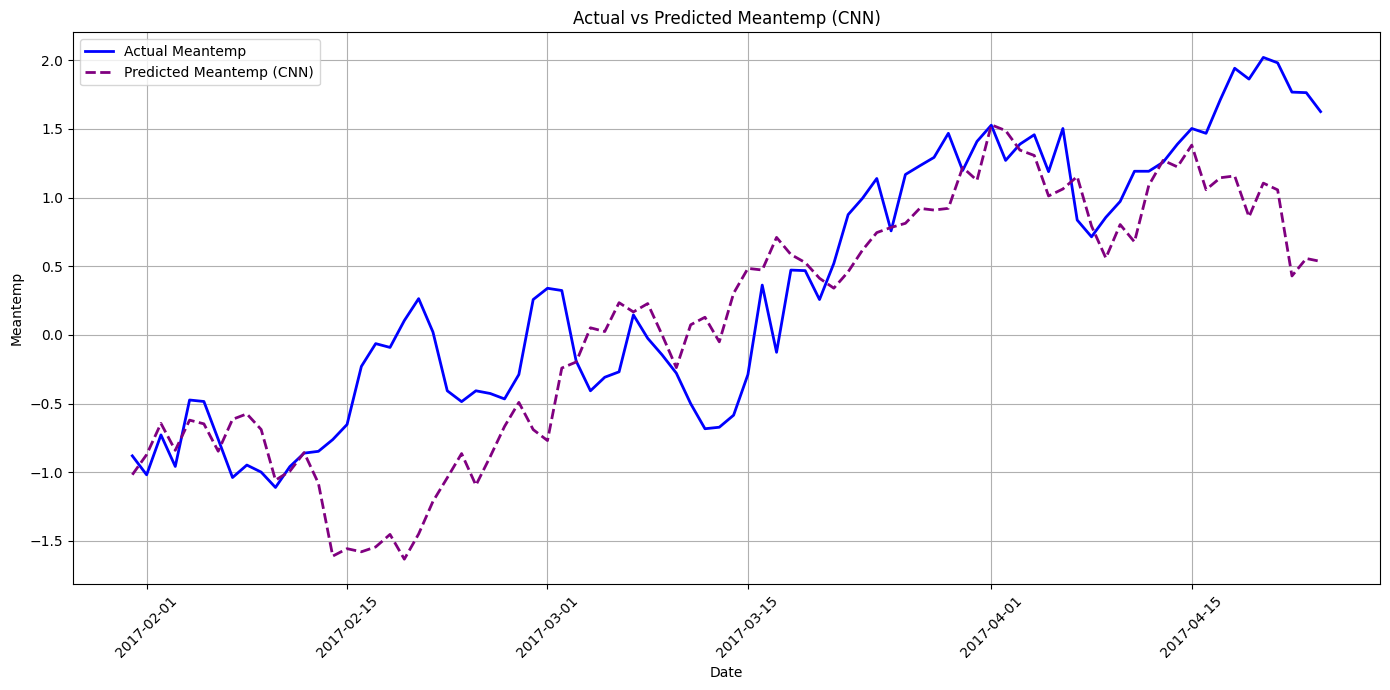

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare data for CNN
# Scaling data for better performance with neural networks
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(climate_train_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])
scaled_test = scaler.transform(climate_test_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])

# Define function to create sequences for CNN input
def create_sequences(data, target_column, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, 1:])  # Use predictors
        y.append(data[i + sequence_length, target_column])  # Target variable
    return np.array(X), np.array(y)

# Set the target column index for 'meantemp'
target_column = 0
sequence_length = 30  # Define sequence length

# Create sequences for training and testing
X_train, y_train = create_sequences(scaled_train, target_column, sequence_length)
X_test, y_test = create_sequences(scaled_test, target_column, sequence_length)

# Reshape for CNN: (samples, time steps, features, 1) for 1D CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    tf.keras.layers.Conv2D(32, (3, 1), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Predict and inverse transform the predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate([y_pred_scaled, np.zeros((len(y_pred_scaled), X_test.shape[2]))], axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), X_test.shape[2]))], axis=1))[:, 0]

# Evaluate the model
mae_cnn = mean_absolute_error(y_test_actual, y_pred)
mse_cnn = mean_squared_error(y_test_actual, y_pred)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test_actual, y_pred)

print("CNN Model Evaluation:")
print(f"MAE: {mae_cnn}, MSE: {mse_cnn}, RMSE: {rmse_cnn}, R2: {r2_cnn}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(14, 7))

# Plot actual test values
plt.plot(climate_test_data['date'][sequence_length:], y_test_actual, label='Actual Meantemp', color='blue', linestyle='-', linewidth=2)

# Plot CNN predicted values
plt.plot(climate_test_data['date'][sequence_length:], y_pred, label='Predicted Meantemp (CNN)', color='purple', linestyle='--', linewidth=2)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (CNN)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Propet model**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpctvmjozc/pqb7z8rx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpctvmjozc/hglm3sqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59659', 'data', 'file=/tmp/tmpctvmjozc/pqb7z8rx.json', 'init=/tmp/tmpctvmjozc/hglm3sqi.json', 'output', 'file=/tmp/tmpctvmjozc/prophet_modelkbjlbtre/prophet_model-20241028174247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:42:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:42:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet Model Evaluation:
MAE: 0.4247898233341928, MSE: 0.2731991478061565, RMSE: 0.5226845586069637, R2: 0.7268008521938435


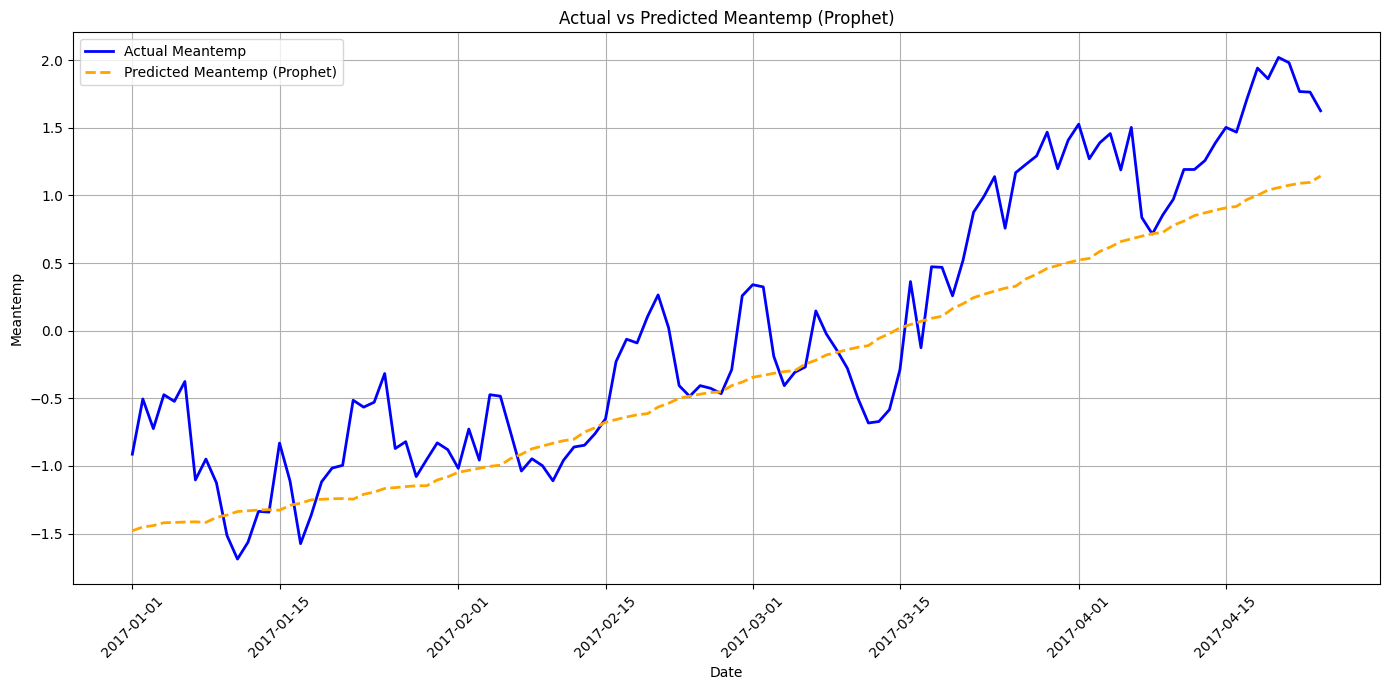

In [ ]:
# Import necessary libraries
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for Prophet
# Prophet expects two columns: 'ds' for date and 'y' for the target variable
prophet_data = climate_train_data[['date', 'meantemp']].copy()
prophet_data.columns = ['ds', 'y']  # Rename columns to fit Prophet's requirements

# Initialize and fit the Prophet model
prophet_model = Prophet(daily_seasonality=True, yearly_seasonality=True)
prophet_model.fit(prophet_data)

# Make a DataFrame for future dates
future_dates = climate_test_data[['date']].copy()
future_dates.columns = ['ds']  # Prophet expects the column name to be 'ds'

# Forecast the future dates
forecast = prophet_model.predict(future_dates)

# Evaluation metrics
y_pred_prophet = forecast['yhat'].values
y_test = climate_test_data['meantemp'].values

mae_prophet = mean_absolute_error(y_test, y_pred_prophet)
mse_prophet = mean_squared_error(y_test, y_pred_prophet)
rmse_prophet = np.sqrt(mse_prophet)
r2_prophet = r2_score(y_test, y_pred_prophet)

print("Prophet Model Evaluation:")
print(f"MAE: {mae_prophet}, MSE: {mse_prophet}, RMSE: {rmse_prophet}, R2: {r2_prophet}")

# Plotting Actual vs Predicted
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(climate_test_data['date'], y_test, label='Actual Meantemp', color='blue', linestyle='-', linewidth=2)

# Plot Prophet forecast
plt.plot(climate_test_data['date'], y_pred_prophet, label='Predicted Meantemp (Prophet)', color='orange', linestyle='--', linewidth=2)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (Prophet)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **LSTM model**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0956 - val_loss: 0.0068
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0079 - val_loss: 0.0086
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0076 - val_loss: 0.0049
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0074 - val_loss: 0.0053
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0057 - val_loss: 0.0061
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0055 - val_loss: 0.0070
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0061 - val_loss: 0.0048
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0054 - val_loss: 0.0042
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0061 - val_loss: 0.0067
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0055 - val_loss: 0.0062
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - los

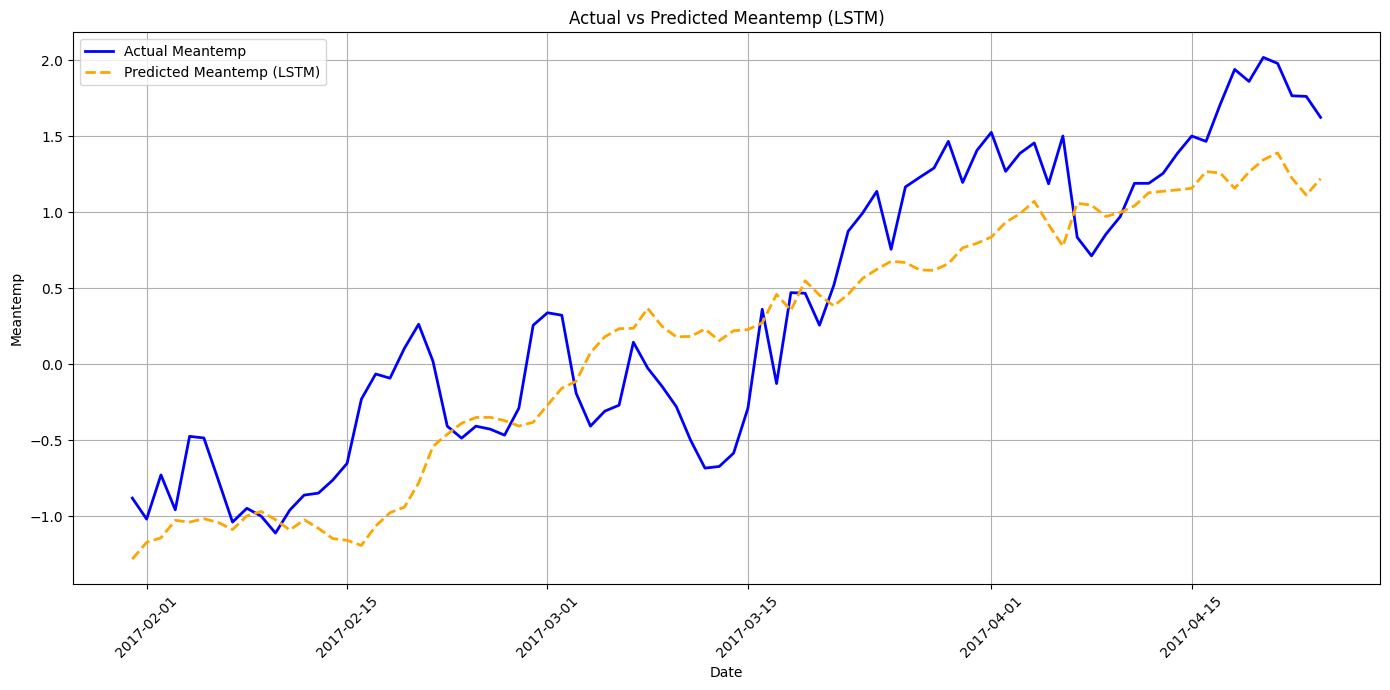

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare data for LSTM
# Scaling data for better performance with neural networks
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(climate_train_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])
scaled_test = scaler.transform(climate_test_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])

# Define function to create sequences for LSTM input
def create_sequences(data, target_column, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, 1:])  # Use predictors
        y.append(data[i + sequence_length, target_column])  # Target variable
    return np.array(X), np.array(y)

# Set the target column index for 'meantemp'
target_column = 0
sequence_length = 30  # Define sequence length

# Create sequences for training and testing
X_train, y_train = create_sequences(scaled_train, target_column, sequence_length)
X_test, y_test = create_sequences(scaled_test, target_column, sequence_length)

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Final output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Predict and inverse transform the predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate([y_pred_scaled, np.zeros((len(y_pred_scaled), X_test.shape[2]))], axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), X_test.shape[2]))], axis=1))[:, 0]

# Evaluate the model
mae_lstm = mean_absolute_error(y_test_actual, y_pred)
mse_lstm = mean_squared_error(y_test_actual, y_pred)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_actual, y_pred)

print("LSTM Model Evaluation:")
print(f"MAE: {mae_lstm}, MSE: {mse_lstm}, RMSE: {rmse_lstm}, R2: {r2_lstm}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(14, 7))

# Plot actual test values
plt.plot(climate_test_data['date'][sequence_length:], y_test_actual, label='Actual Meantemp', color='blue', linestyle='-', linewidth=2)

# Plot LSTM predicted values
plt.plot(climate_test_data['date'][sequence_length:], y_pred, label='Predicted Meantemp (LSTM)', color='orange', linestyle='--', linewidth=2)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (LSTM)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Bi-directional LSTM**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, 30, 128)             │          34,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,089 (301.13 KB)

 Trainable params: 77,089 (301.13 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 63ms/step - loss: 0.0701 - val_loss: 0.0089
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0087 - val_loss: 0.0079
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0061 - val_loss: 0.0080
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0060 - val_loss: 0.0070
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0055 - val_loss: 0.0061
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0052 - val_loss: 0.0061
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0056 - val_loss: 0.0058
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0047 - val_loss: 0.0062
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0054 - val_loss: 0.0079
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - lo

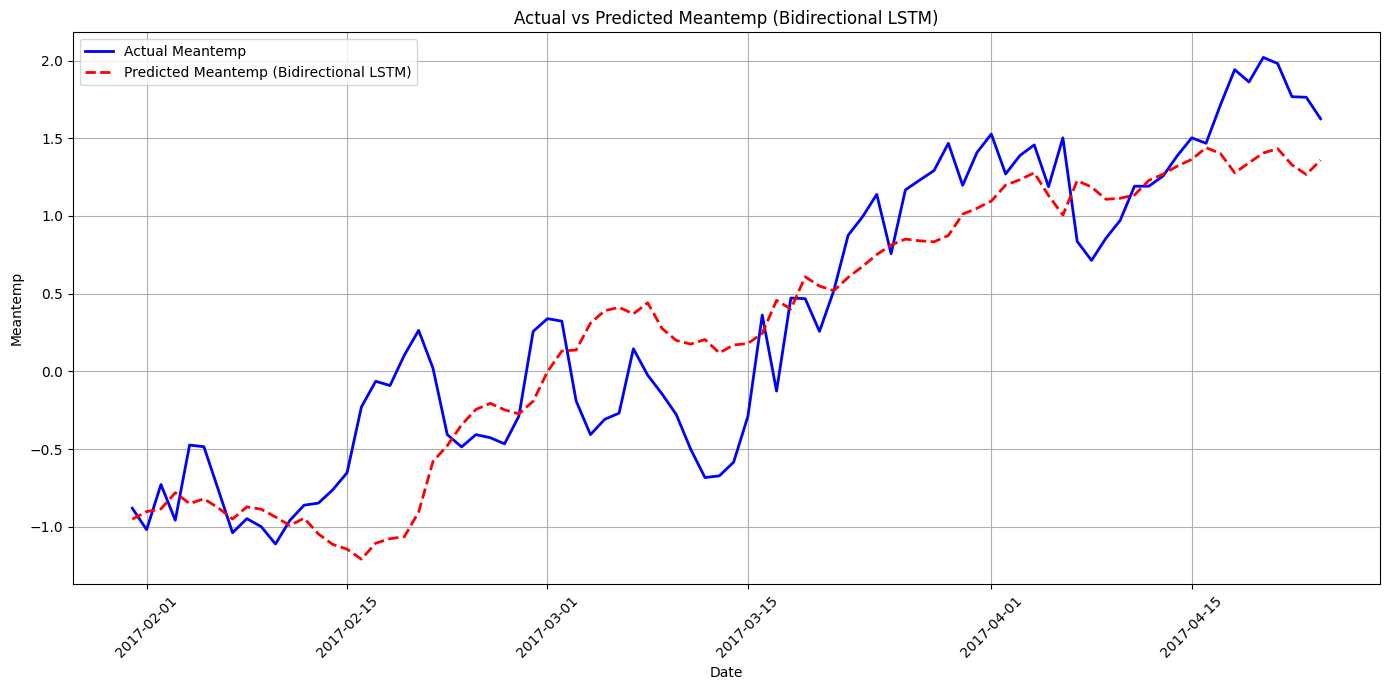

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare data for Bidirectional LSTM
# Scale data for better performance with neural networks
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(climate_train_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])
scaled_test = scaler.transform(climate_test_data[['meantemp', 'meanpressure', 'humidity', 'wind_speed']])

# Function to create sequences
def create_sequences(data, target_column, sequence_length=30):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, 1:])  # Use predictors only
        y.append(data[i + sequence_length, target_column])  # Target variable
    return np.array(X), np.array(y)

# Set the target column index for 'meantemp'
target_column = 0
sequence_length = 30  # Define sequence length

# Create sequences for training and testing
X_train, y_train = create_sequences(scaled_train, target_column, sequence_length)
X_test, y_test = create_sequences(scaled_test, target_column, sequence_length)

# Reshape for LSTM input: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Build the Bidirectional LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# Predict and inverse transform the predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate([y_pred_scaled, np.zeros((len(y_pred_scaled), X_test.shape[2]))], axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test), X_test.shape[2]))], axis=1))[:, 0]

# Evaluate the model
mae_bilstm = mean_absolute_error(y_test_actual, y_pred)
mse_bilstm = mean_squared_error(y_test_actual, y_pred)
rmse_bilstm = np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test_actual, y_pred)

print("Bidirectional LSTM Model Evaluation:")
print(f"MAE: {mae_bilstm}, MSE: {mse_bilstm}, RMSE: {rmse_bilstm}, R2: {r2_bilstm}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(14, 7))

# Plot actual test values
plt.plot(climate_test_data['date'][sequence_length:], y_test_actual, label='Actual Meantemp', color='blue', linestyle='-', linewidth=2)

# Plot Bidirectional LSTM predicted values
plt.plot(climate_test_data['date'][sequence_length:], y_pred, label='Predicted Meantemp (Bidirectional LSTM)', color='red', linestyle='--', linewidth=2)

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Meantemp')
plt.title('Actual vs Predicted Meantemp (Bidirectional LSTM)')
plt.legend()
plt.grid(True)

# Rotate and format the x-axis dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **GRU**

In [ ]:
## Define features and target

import pandas as pd
import numpy as np

# Assuming your data is already loaded into climate_train_data and climate_test_data
train_data = climate_train_data[['date', 'meanpressure', 'humidity', 'wind_speed', 'meantemp']]
test_data = climate_test_data[['date', 'meanpressure', 'humidity', 'wind_speed', 'meantemp']]

# Ensure date is in datetime format and set it as index (if needed)
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

# Split features and target
X_train = train_data[['meanpressure', 'humidity', 'wind_speed']].values
y_train = train_data['meantemp'].values
X_test = test_data[['meanpressure', 'humidity', 'wind_speed']].values
y_test = test_data['meantemp'].values


<ipython-input-67-120e4b04a6ae>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['date'] = pd.to_datetime(train_data['date'])


In [ ]:
## Create time series data
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 1  # Adjust this based on how many previous time steps you want to use
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)


In [ ]:
## Build GRU model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout


In [ ]:
## Create the model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(50))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
## Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
## train the model
model.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.7605 - val_loss: 0.3407
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1904 - val_loss: 0.1562
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1597 - val_loss: 0.1716
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1515 - val_loss: 0.1555
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1645 - val_loss: 0.1386
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1589 - val_loss: 0.1596
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1555 - val_loss: 0.1764
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1575 - val_loss: 0.1418
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1567 - val_loss: 0.1458
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1572 - val_loss: 0.1530
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1535 - val_loss: 0.1637
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [ ]:
## Evaluate the model
y_train_pred = model.predict(X_train_seq)
y_test_pred = model.predict(X_test_seq)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

#Evaluation
mae_gru = mean_absolute_error(y_test_seq, y_test_pred)
mse_gru = mean_squared_error(y_test_seq, y_test_pred)
rmse_gru = np.sqrt(mse_gru)
r2_gru = r2_score(y_test_seq, y_test_pred)

# Print the results
print(f' GRU MAE: {mae_gru}')
print(f'GRU MSE: {mse_gru}')
print(f'GRU RMSE: {rmse_gru}')
print(f'GRU R²: {r2_gru}')



 GRU MAE: 0.4612255139551545
GRU MSE: 0.30676685016127825
GRU RMSE: 0.553865371874139
GRU R²: 0.6936614218153456


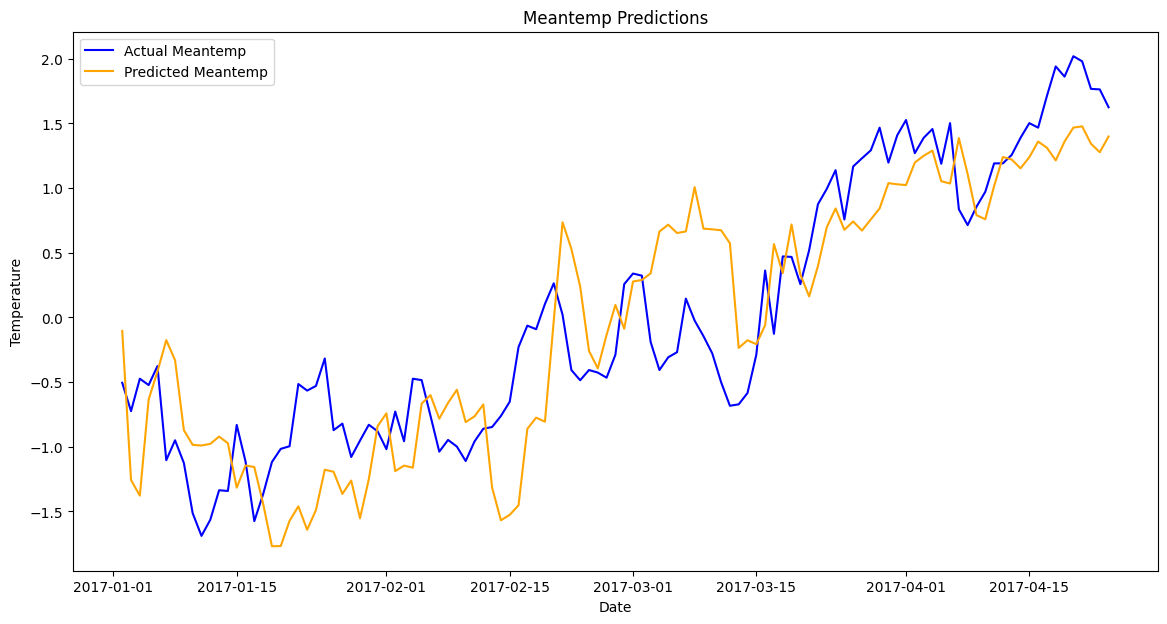

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(test_data.index[time_steps:], y_test_seq, label='Actual Meantemp', color='blue')
plt.plot(test_data.index[time_steps:], y_test_pred, label='Predicted Meantemp', color='orange')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Meantemp Predictions')
plt.legend()
plt.show()


## **Comparison of results**

In [ ]:
# Example comparison dictionary
results = {
    'Model': ['RFR', 'XGBoost', 'SVM', 'Simple NN', 'RNN', 'CNN', 'Prophet', 'LSTM', 'Bi-LSTM', 'GRU'],
    'MAE': [mae_rfr, mae_xgb, mae_svm, mae_nn, mae_rnn, mae_cnn, mae_prophet, mae_lstm, mae_bilstm, mae_gru],
    'MSE': [mse_rfr, mse_xgb, mse_svm, mse_nn, mse_rnn, mse_cnn, mse_prophet, mse_lstm, mse_bilstm, mse_gru],
    'RMSE': [rmse_rfr, rmse_xgb, rmse_svm, rmse_nn, rmse_rnn, rmse_cnn, rmse_prophet, rmse_lstm, rmse_bilstm, rmse_gru],
    'R2': [r2_rfr, r2_xgb, r2_svm, r2_nn, r2_rnn, r2_cnn, r2_prophet, r2_lstm, r2_bilstm, r2_gru]
}
results_df = pd.DataFrame(results)

# sort the result
results_df.sort_values(by = 'R2', ascending=False).reset_index(drop=True)

Model       MAE       MSE      RMSE        R2
0    Bi-LSTM  0.353449  0.203249  0.450831  0.765185
1  Simple NN  0.396184  0.246875  0.496866  0.753125
2        RNN  0.403120  0.255753  0.505720  0.744247
3        SVM  0.419223  0.272565  0.522077  0.727435
4    Prophet  0.424790  0.273199  0.522685  0.726801
5       LSTM  0.404668  0.239259  0.489141  0.723582
6        GRU  0.461226  0.306767  0.553865  0.693661
7    XGBoost  0.449187  0.313753  0.560136  0.686247
8        RFR  0.460185  0.327757  0.572500  0.672243
9        CNN  0.466210  0.401346  0.633518  0.536322